# Data Visualizations 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

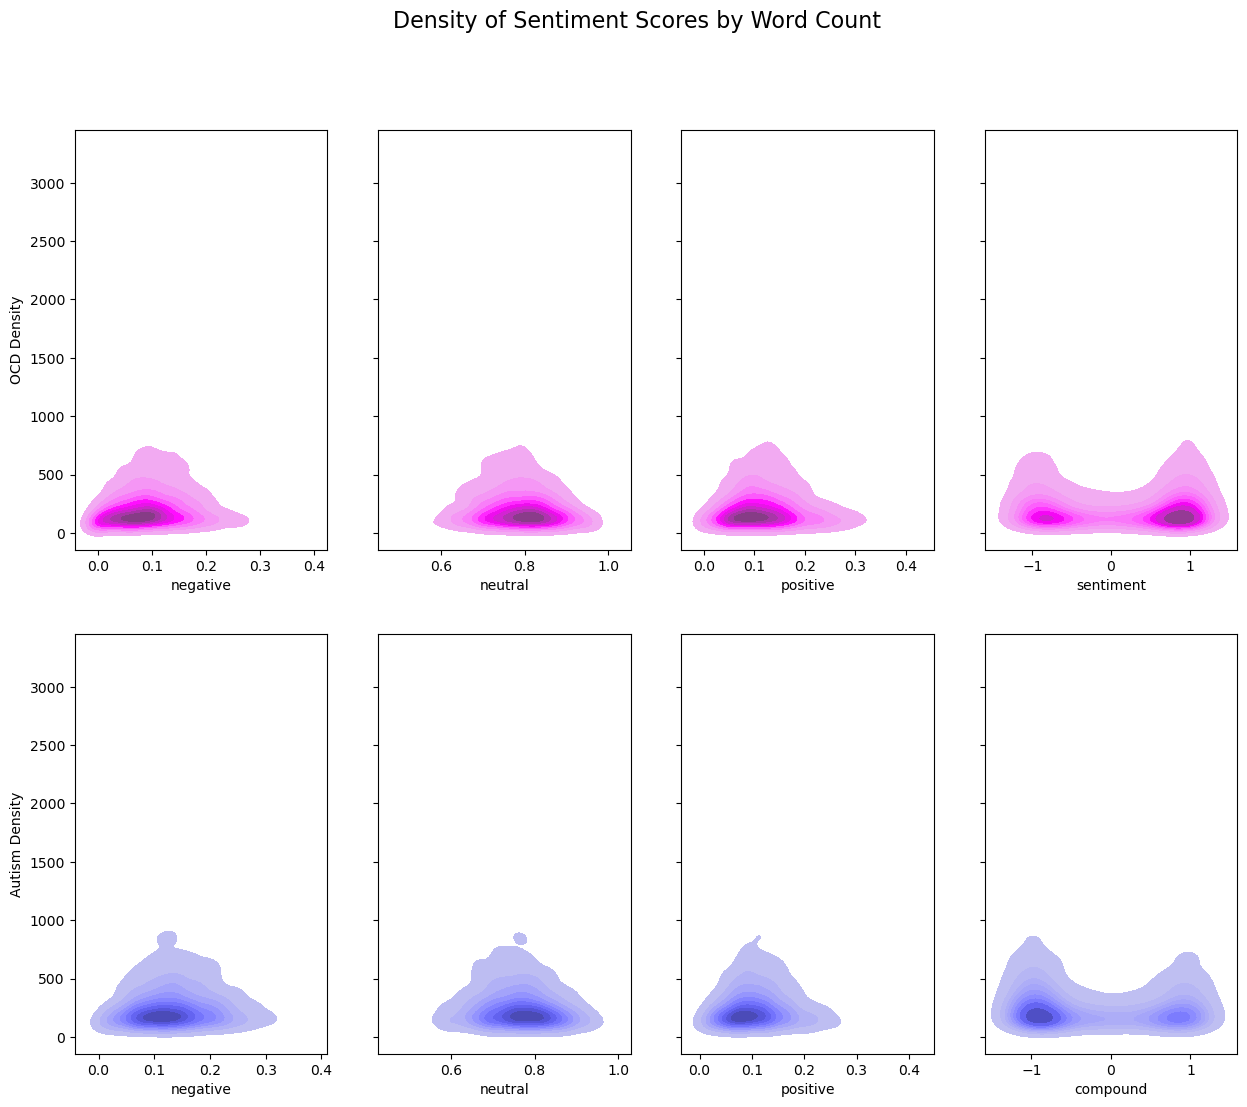

In [3]:
# plot a multiplot 2 rows of (four plots side by side) where each plot is a sns.kdeplot showing density of the target variable (subreddit) for each of the four features: negative, neutral, positive, compound in the dataframe df_reddit. Share the y-axis and set the x-axis limits to (0, 1) for all eight plots.
df_reddit = pd.read_csv('../data/cleaned_reddit_withsentiment.csv')
master_results_dataframe = pd.read_csv('../data/master_results_dataframe.csv')
# using the style shown on seaborn's website
# sns.kdeplot(
#     data=geyser, x="waiting", y="duration", hue="kind", fill=True,
# )

# make the first row of plots orange and the second row of plots blue

sns.color_palette("tab10")

fig, axes = plt.subplots(2, 4, figsize=(15, 12), sharey=True)

for i, col in enumerate(['negative', 'neutral', 'positive', 'sentiment']):
    for row in range(2):
        sns.kdeplot(df_reddit.loc[df_reddit['target'] == row, col], df_reddit.loc[df_reddit['target'] == row, 'selftext_word_count'], shade=True, label='OCD', ax=axes[row, i], fill=True, color='purple' if row == 0 else 'blue', alpha = 0.95 if row == 0 else 1)
        sns.kdeplot(df_reddit.loc[df_reddit['target'] == row, col], df_reddit.loc[df_reddit['target'] == row, 'selftext_word_count'], shade=True, label='Autism', ax=axes[row, i], fill=True, color='purple' if row == 0 else 'blue', alpha = 0.95 if row == 0 else 1)

fig.suptitle('Density of Sentiment Scores by Word Count', fontsize=16)

# set the x-axis labels for the bottom row of plots
axes[1, 0].set_xlabel('negative')
axes[1, 1].set_xlabel('neutral')
axes[1, 2].set_xlabel('positive')
axes[1, 3].set_xlabel('compound')


# set the y-axis labels for both rows of plots
axes[0, 0].set_ylabel('OCD Density')
axes[1, 0].set_ylabel('Autism Density')
plt.show();


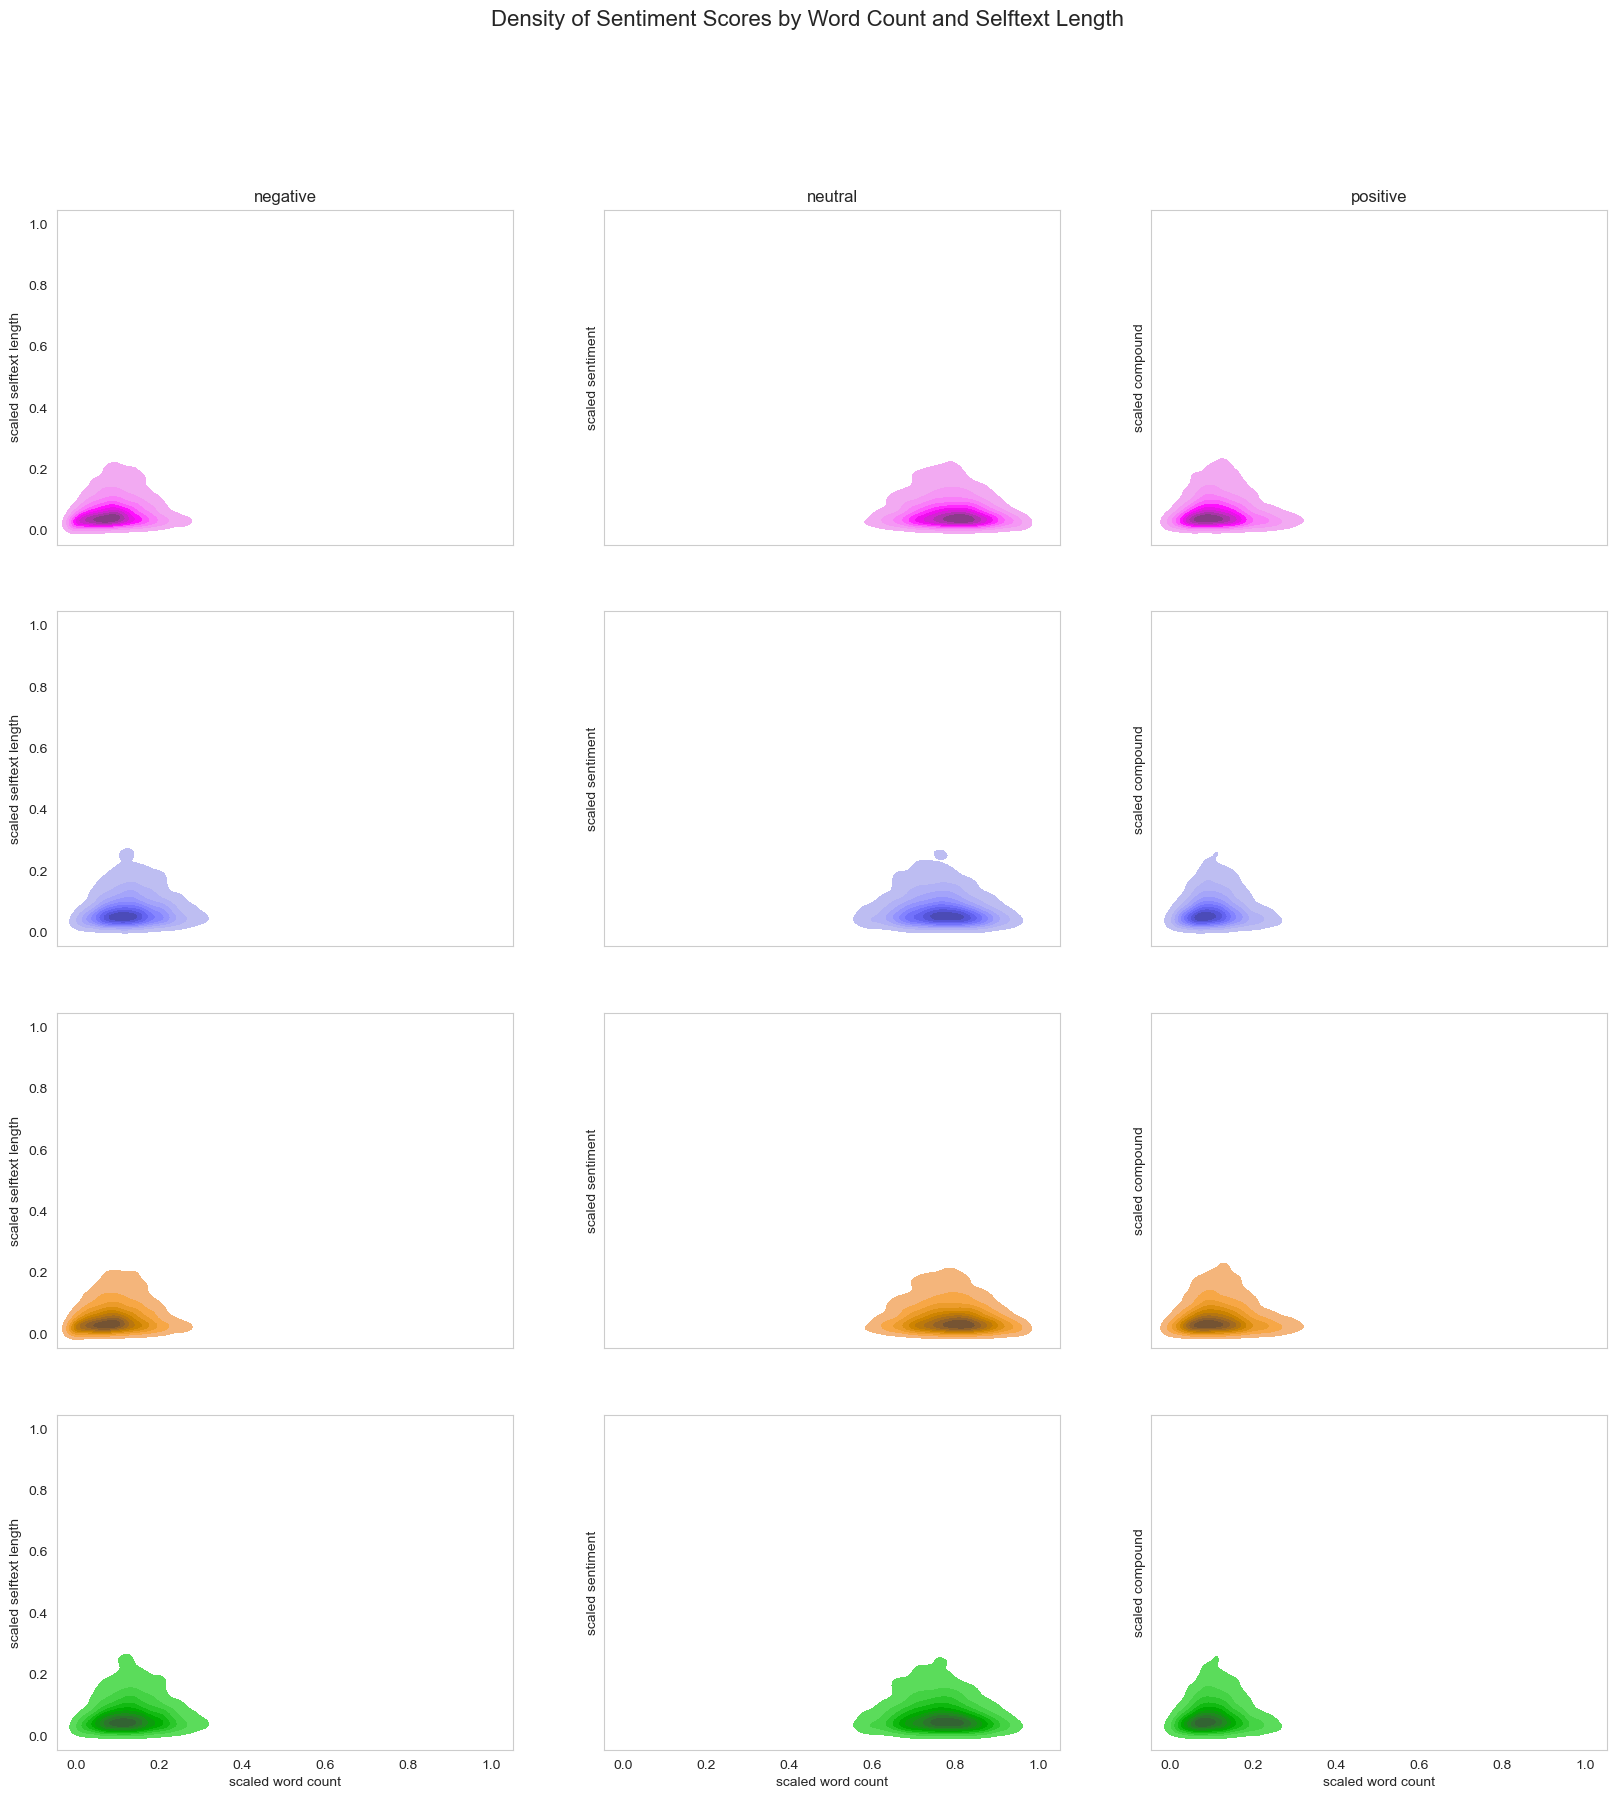

In [4]:
# This data visual has four columns and four rows.
# The first two rows represent the density of the target variable which is the subreddit based on word counts. 
# Rows three and four represent the same thing as row one and two but use self text length as the density measure.
# import StandardScaler
from sklearn.preprocessing import StandardScaler
# use minmax scaler to scale the data
from sklearn.preprocessing import MinMaxScaler
# The first row is purple the second row is blue the third row is orange and the 4th row is green the X labels are empty on rows 1, 2 and 3 but are filled on row 4. All the plots share x and y.

# create a temp df that has scaled versions of the selftext_word_count and selftext_length columns between -1 and 1 using the StandardScaler() function from sklearn.preprocessing module, then add the target column to the temp df
df_temp = pd.DataFrame(MinMaxScaler().fit_transform(df_reddit[['selftext_word_count', 'selftext_length']]), columns=['selftext_word_count', 'selftext_length'])
df_temp['target'] = df_reddit['target']
# add the negative, neutral, positive, and compound columns to the temp df
df_temp['negative'] = df_reddit['negative']
df_temp['neutral'] = df_reddit['neutral']
df_temp['positive'] = df_reddit['positive']
df_temp['sentiment'] = df_reddit['sentiment']

# remove grid lines
sns.set_style("whitegrid", {'axes.grid' : False})
sns.color_palette("viridis")

fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey=True, sharex=True)

for i, col in enumerate(['negative', 'neutral', 'positive']):
    for row in range(4):
        # set the title for the first column of plots to the name of the column (i.e. negative, neutral, positive)
        if row == 0:
            axes[row, i].set_title(col)
        # set the x-axis labels for the bottom row of plots
        if row == 3:
            axes[row, i].set_xlabel('scaled word count')
        # set the y-axis labels for the first column of plots   
        if i == 0:
            axes[row, i].set_ylabel('scaled selftext length')
        # set the y-axis labels for the second column of plots  
        if i == 1:
            axes[row, i].set_ylabel('scaled sentiment')
        # set the y-axis labels for the third column of plots   
        if i == 2:
            axes[row, i].set_ylabel('scaled compound')

        # plot the density of the target variable (subreddit) for each of the four features: negative, neutral, positive, compound in the dataframe df_temp
        # sns.kdeplot(df_temp.loc[df_temp['target'] == row, 'selftext_word_count'], df_temp.loc[df_temp['target'] == row, col], shade=True, label='OCD', ax=axes[row, i], fill=True, color='purple' if row == 0 else 'blue', alpha = 0.95 if row == 0 else 1)
        # sns.kdeplot(df_temp.loc[df_temp['target'] == row, 'selftext_word_count'], df_temp.loc[df_temp['target'] == row, col], shade=True, label='Autism', ax=axes[row, i], fill=True, color='purple' if row == 0 else 'blue', alpha = 0.95 if row == 0 else 1)

        sns.kdeplot(df_temp.loc[df_temp['target'] == row % 2, col], df_temp.loc[df_temp['target'] == row % 2, 'selftext_word_count' if row < 2 else 'selftext_length'], shade=True, label='OCD', ax=axes[row, i], fill=True, color='purple' if row == 0 else 'blue' if row == 1 else 'orange' if row == 2 else 'green', alpha = 0.95 if row == 0 or row == 1 else 1)
        sns.kdeplot(df_temp.loc[df_temp['target'] == row % 2, col], df_temp.loc[df_temp['target'] == row % 2, 'selftext_word_count' if row < 2 else 'selftext_length'], shade=True, label='Autism', ax=axes[row, i], fill=True, color='purple' if row == 0 else 'blue' if row == 1 else 'orange' if row == 2 else 'green', alpha = 0.95 if row == 0 or row == 1 else 1)

fig.suptitle('Density of Sentiment Scores by Word Count and Selftext Length', fontsize=16)
plt.show();

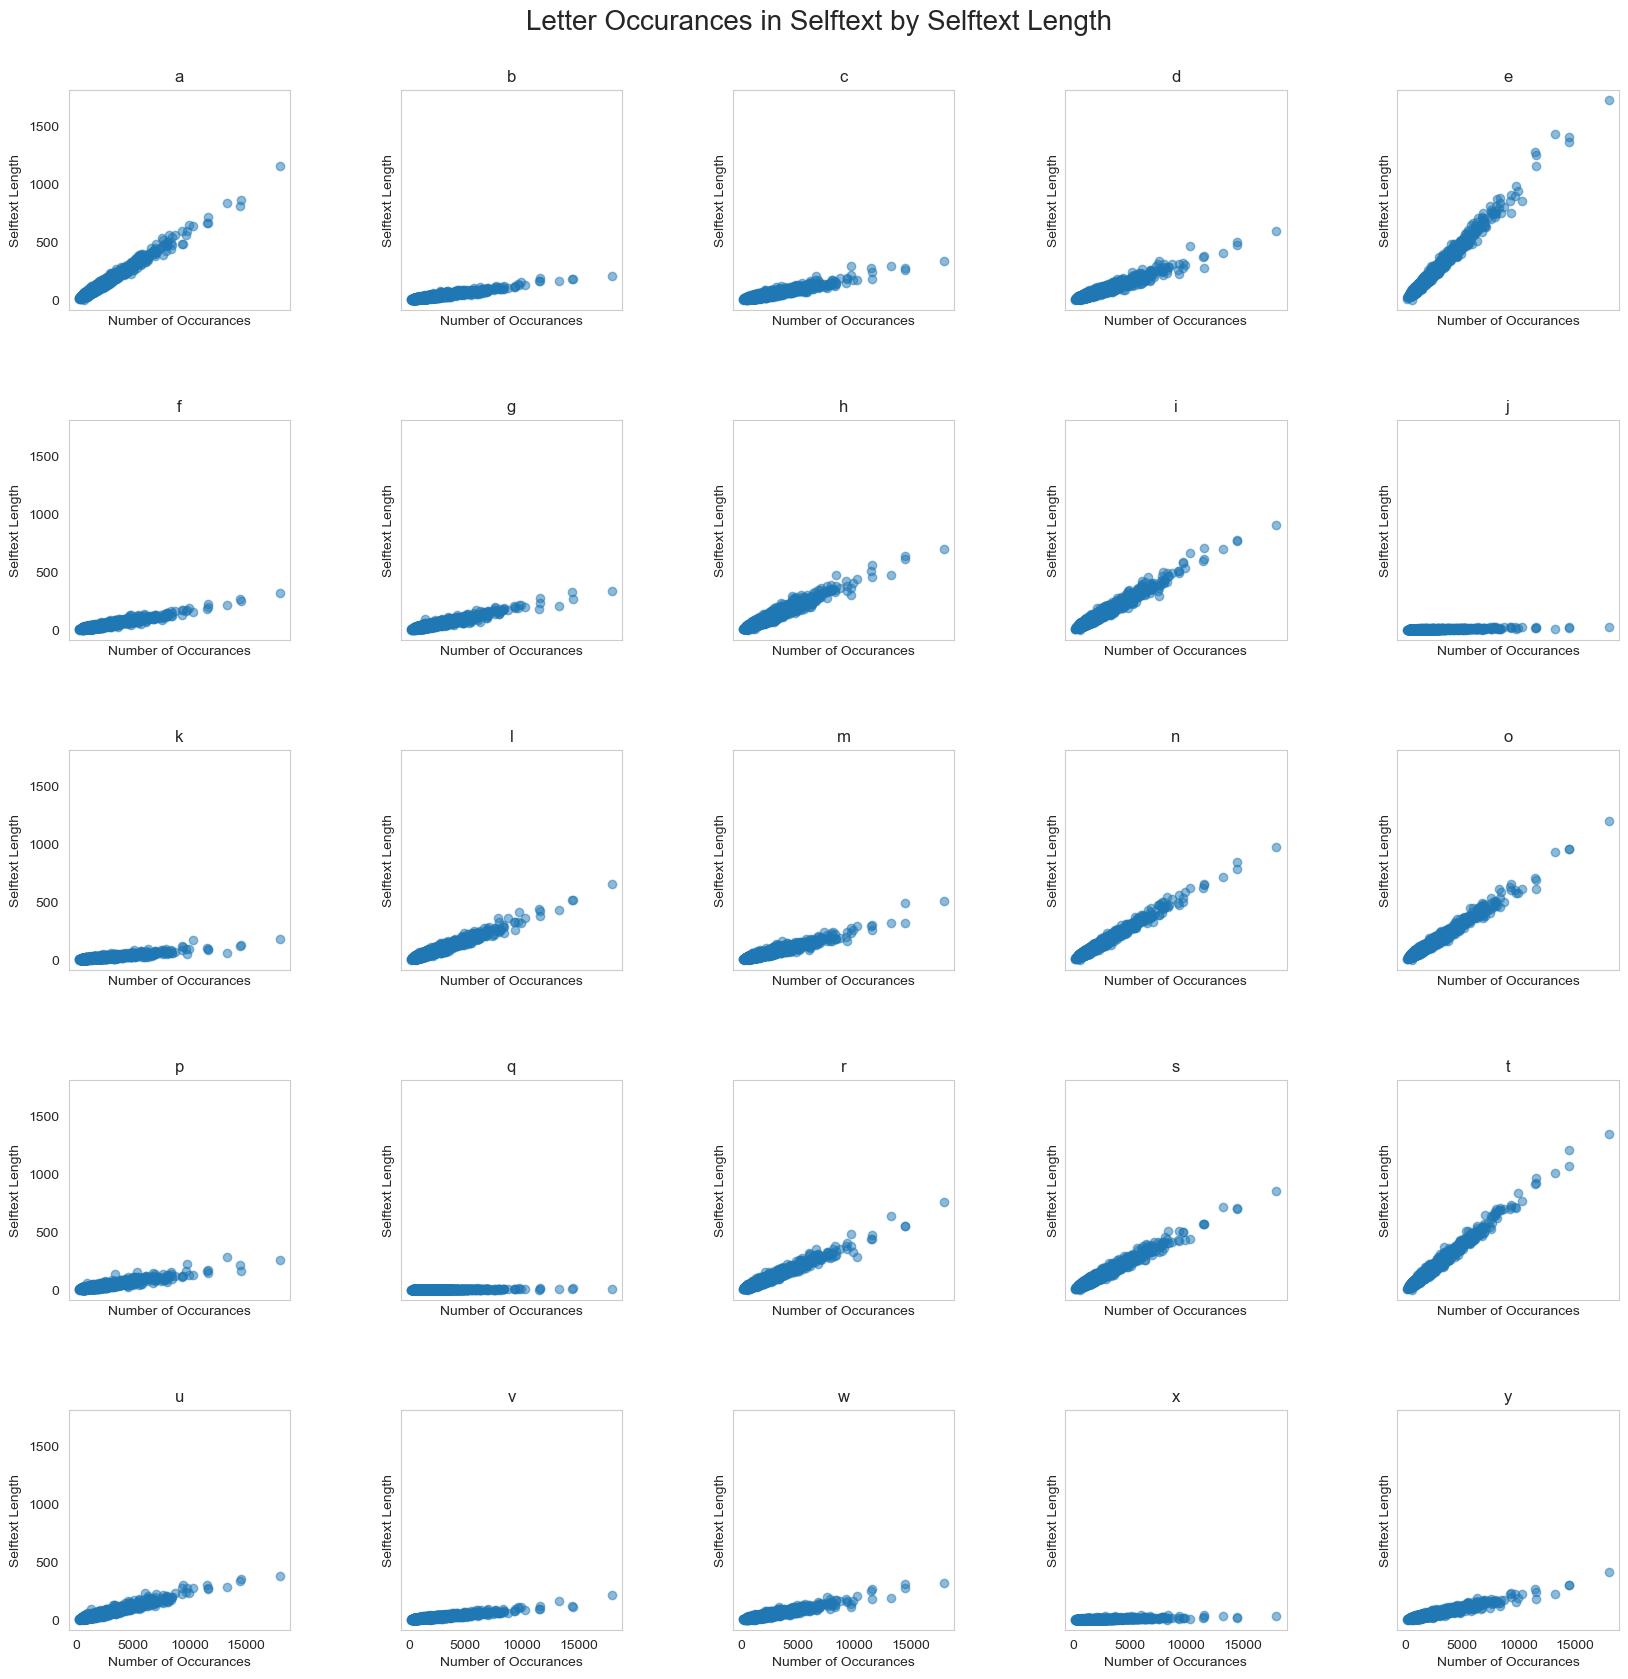

In [5]:
# make a figure plotting letters against number of occurances in selftext for each selftext length bin. To avoid the ValueError "ValueError: num must be 1 <= num <= 16, not 17" the number of bins is set to 25 instead of 26 (the number of letters in the alphabet).
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
df = pd.read_csv('../data/cleaned_reddit_withsentiment.csv')
fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, letter in enumerate('abcdefghijklmnopqrstuvwxyz'):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df['selftext_length'], df[f'{letter}'], alpha=0.5)
        ax.set_title(letter)
        ax.set_xlabel('Number of Occurances')
        ax.set_ylabel('Selftext Length')
    except IndexError:
        pass
fig.suptitle('Letter Occurances in Selftext by Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/letter_histograms.png')
plt.show();


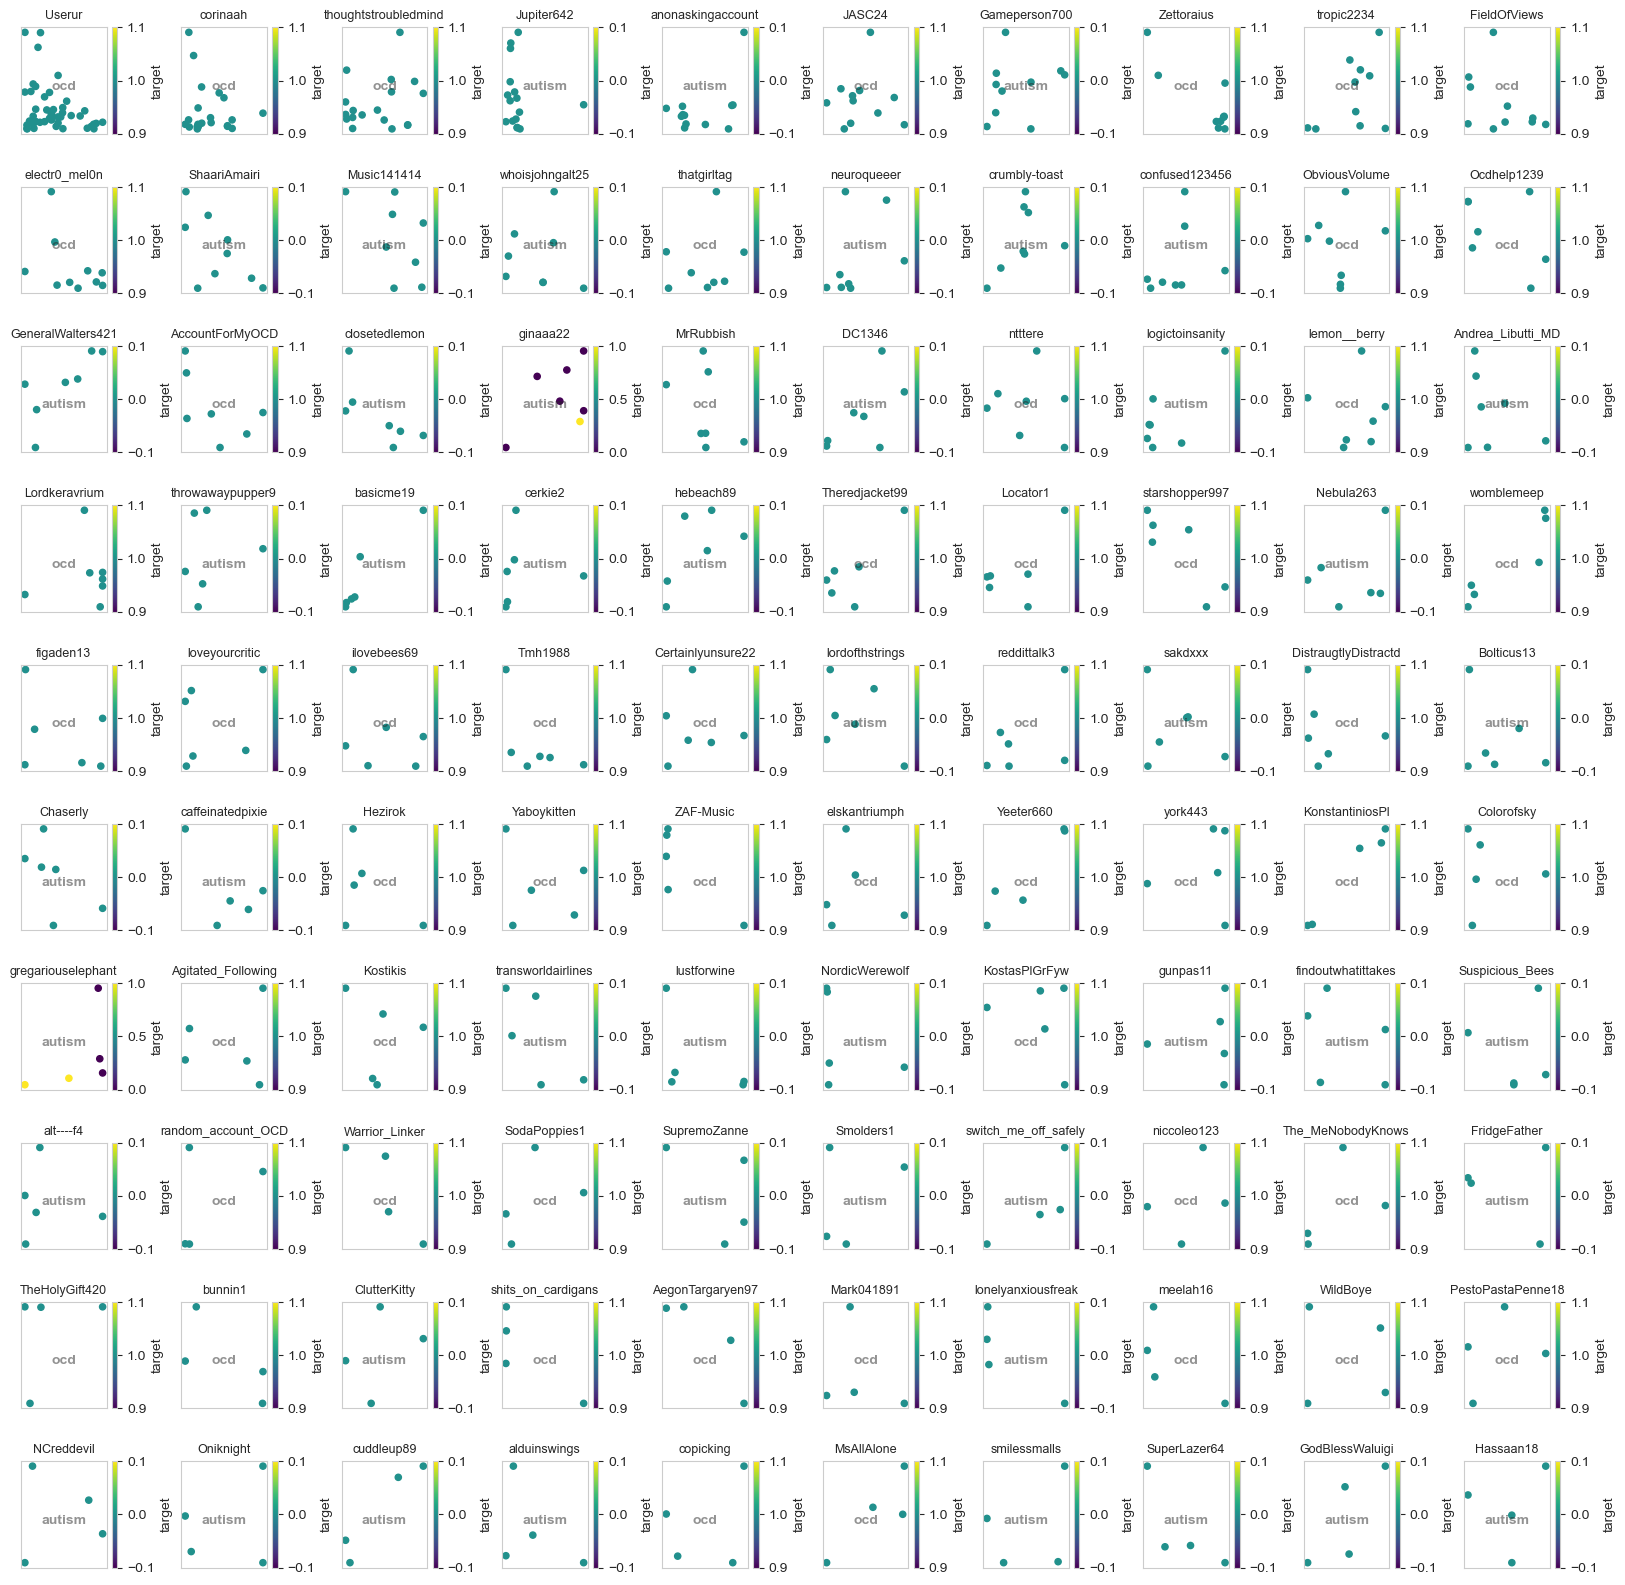

In [6]:
block_active = True # set to False to hide code
# plot the selftext length values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the target value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 0 show the text 'OCD' and for 1 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.
# make the background color of each plot correspond to the selftext length value for that author in the `selftext` column (this is the average length of the selftext string for all of the posts by that author) use the following color map: 'coolwarm' (this is the same color map used for the scatterplots)
# make the background color of the plot lighter if the average selftext length value is closer to 0 and darker if the average selftext length value is closer to 1
# use standard scaler on the selftext length values to make the values between 0 and 1
# scaling the selftext length values
if block_active:
    fig = plt.figure(figsize=(20, 20))
    gs = fig.add_gridspec(10, 10)
    gs.update(wspace=0.5, hspace=0.5) # set the spacing between axes
    for i, author in enumerate(df['author'].value_counts().head(100).index):
        ax = fig.add_subplot(gs[i//10, i%10])
        df[df['author'] == author].plot.scatter(x='created_utc', y='selftext_length', c='target', colormap='viridis', ax=ax)
        ax.set_title(author, fontsize=9)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.annotate('autism' if df[df['author'] == author]['target'].values[0] == 0 else 'ocd', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='top', fontsize=10, fontweight='bold', alpha = 0.5) # add the annotation to the plot

        ax.patch.set_alpha(0.5)
        ax.set_facecolor((1, 1, 1, (1 + df[df['author'] == author]['selftext_length'].mean())/2))
        ax.patch.set_facecolor((1, 1, 1, (1 + df[df['author'] == author]['selftext_length'].mean())/2))
    plt.show();



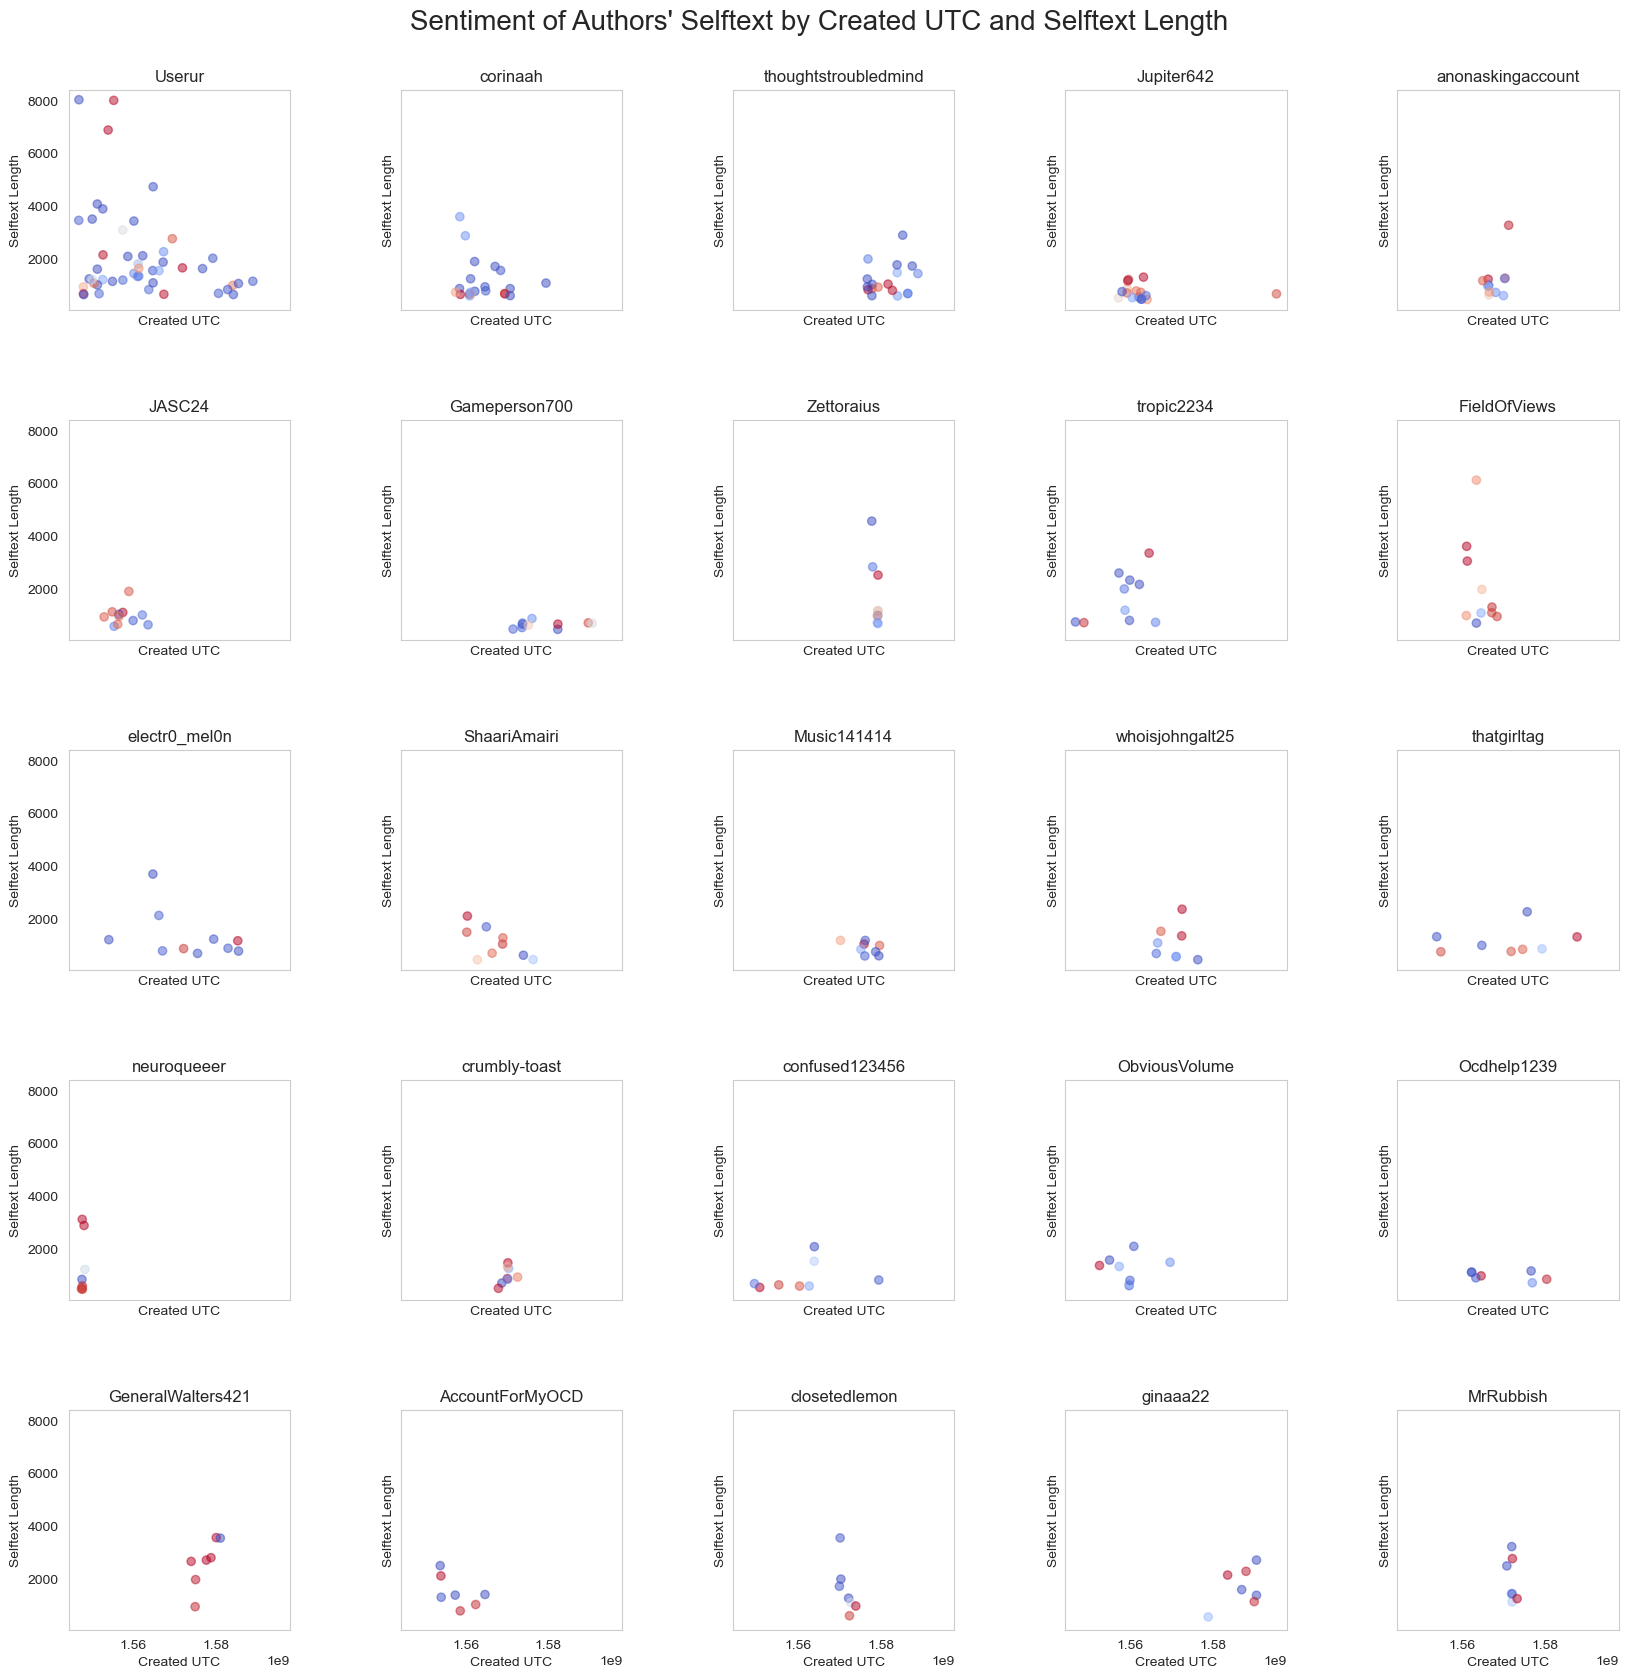

In [7]:
# plot the sentiment values for the top 25 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:25]):
    try:
        ax = axes[i//5, i%5]
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author.png')
plt.show();

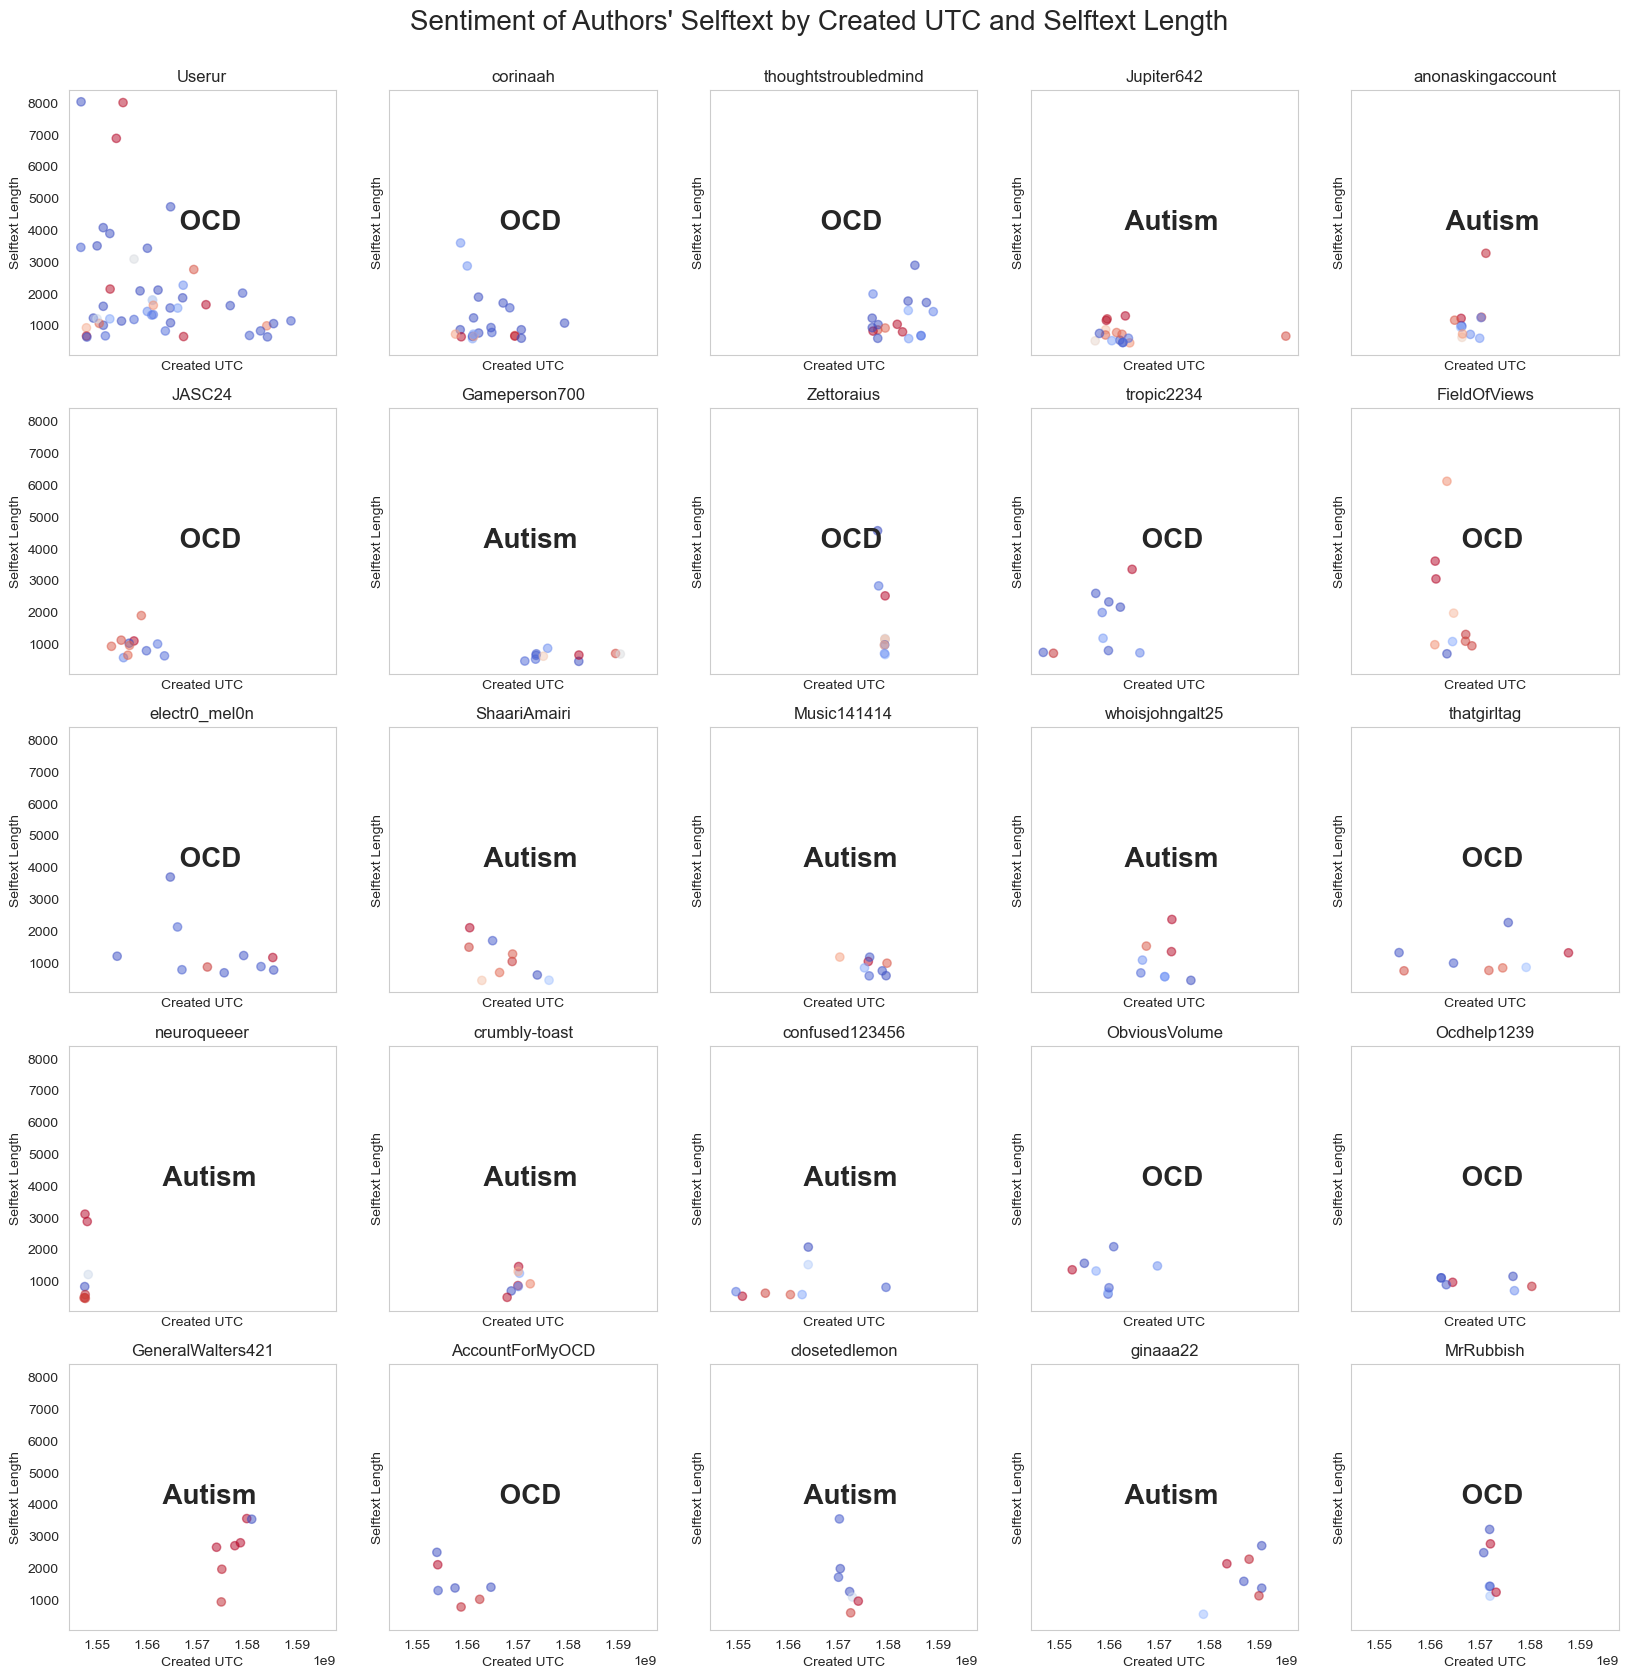

In [8]:
# plot the sentiment values for the top 25 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:25]):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            ax.text(0.5, 0.5, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
        else:
            ax.text(0.5, 0.5, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author_with_target.png')
plt.show();

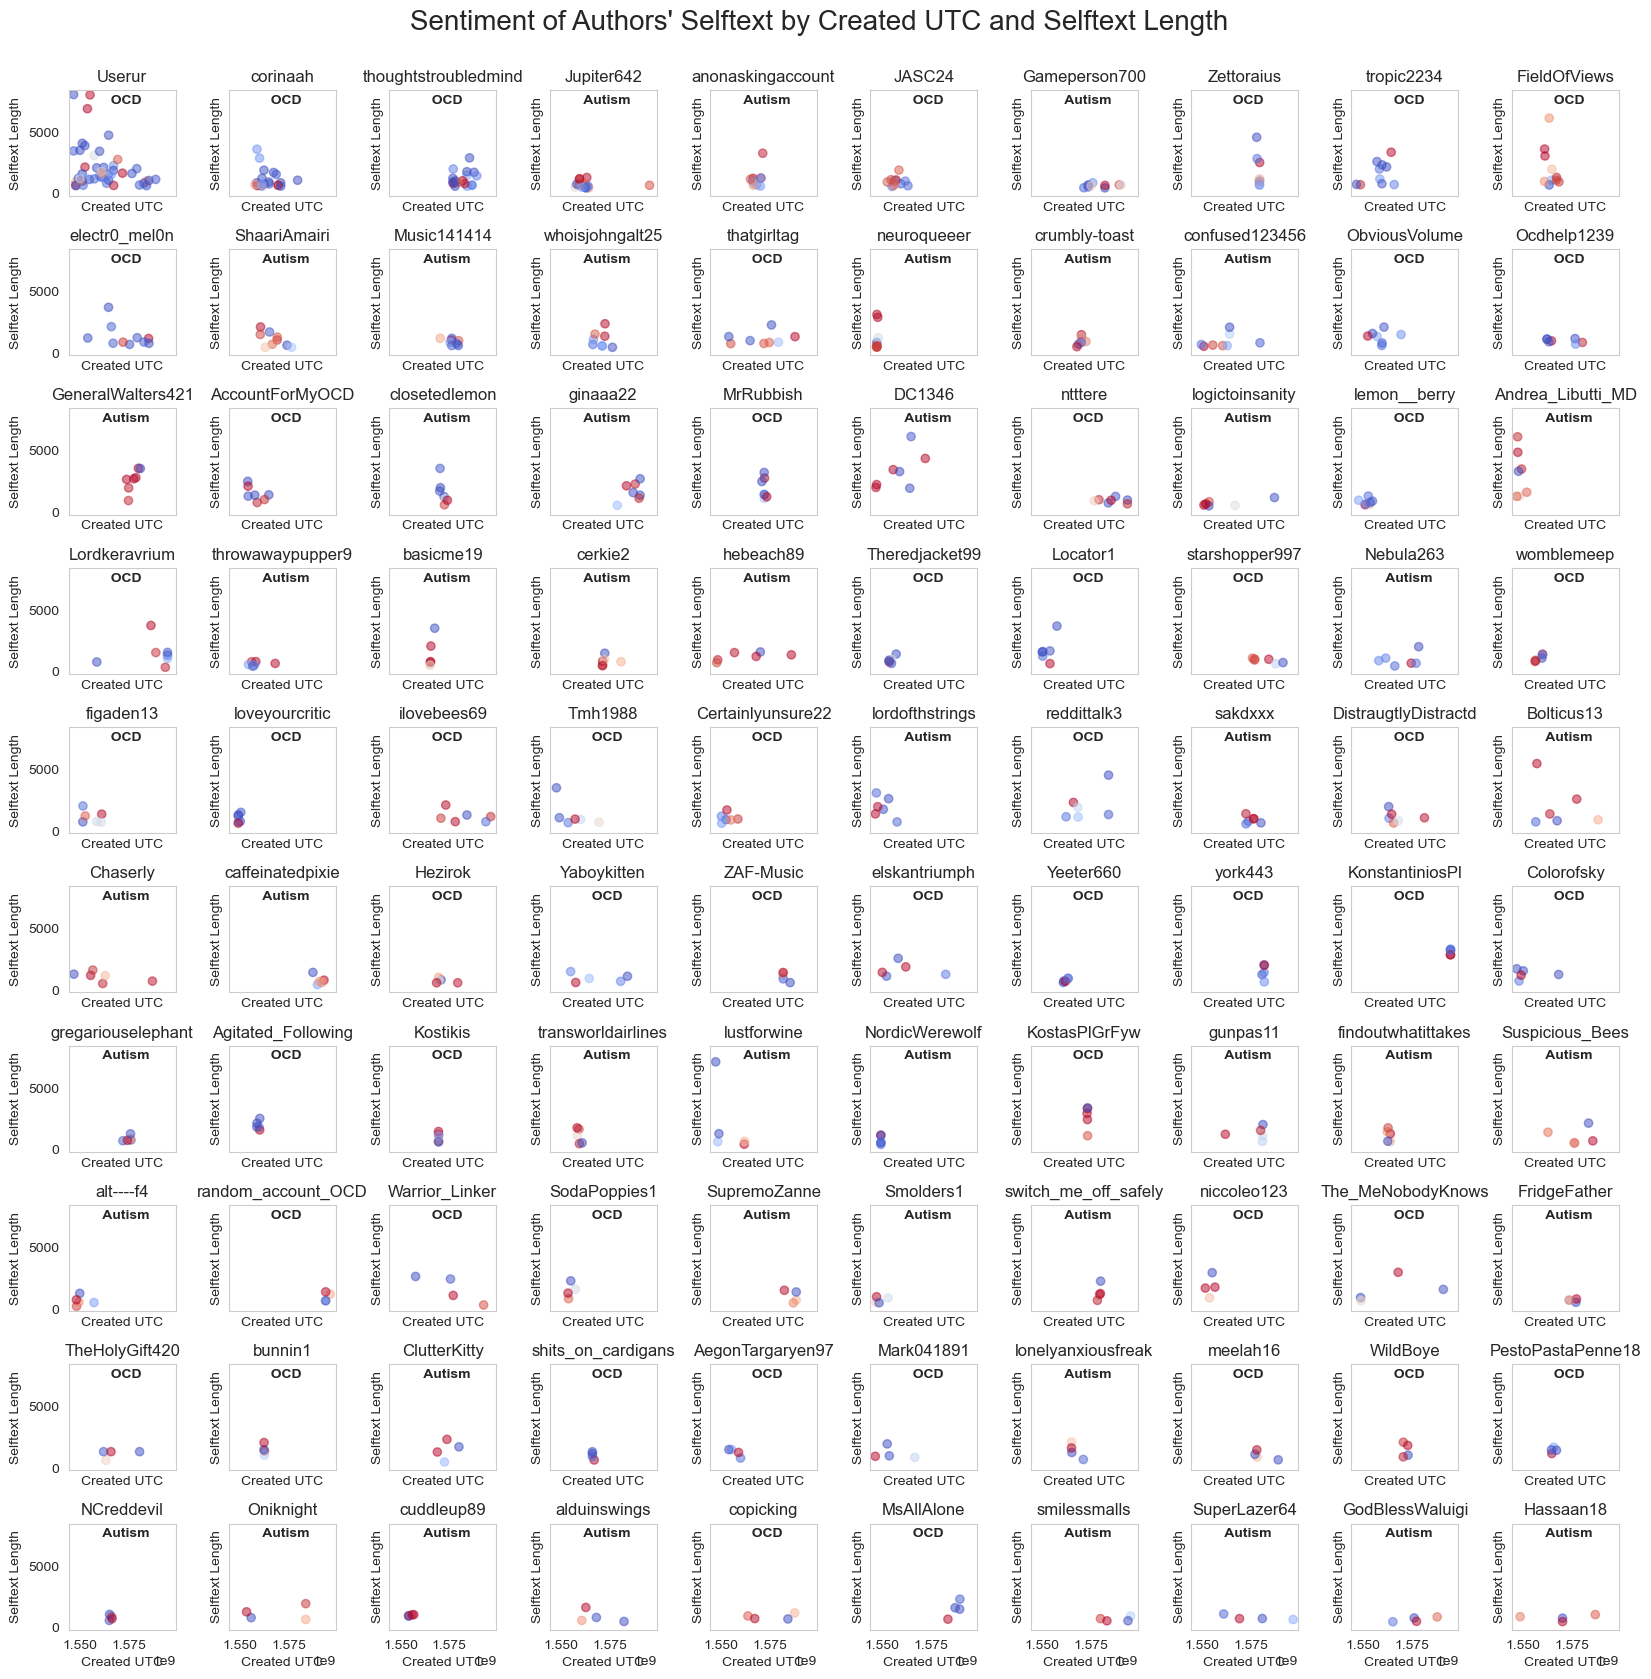

In [9]:
# plot the sentiment values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:100]):
    try:
        ax = axes[i//10, i%10]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            # align text horizontally at the center of the plot and vertically at the top of the plot
            ax.text(0.5, 0.9, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        else:
            ax.text(0.5, 0.9, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author_with_target_100.png')
plt.show();

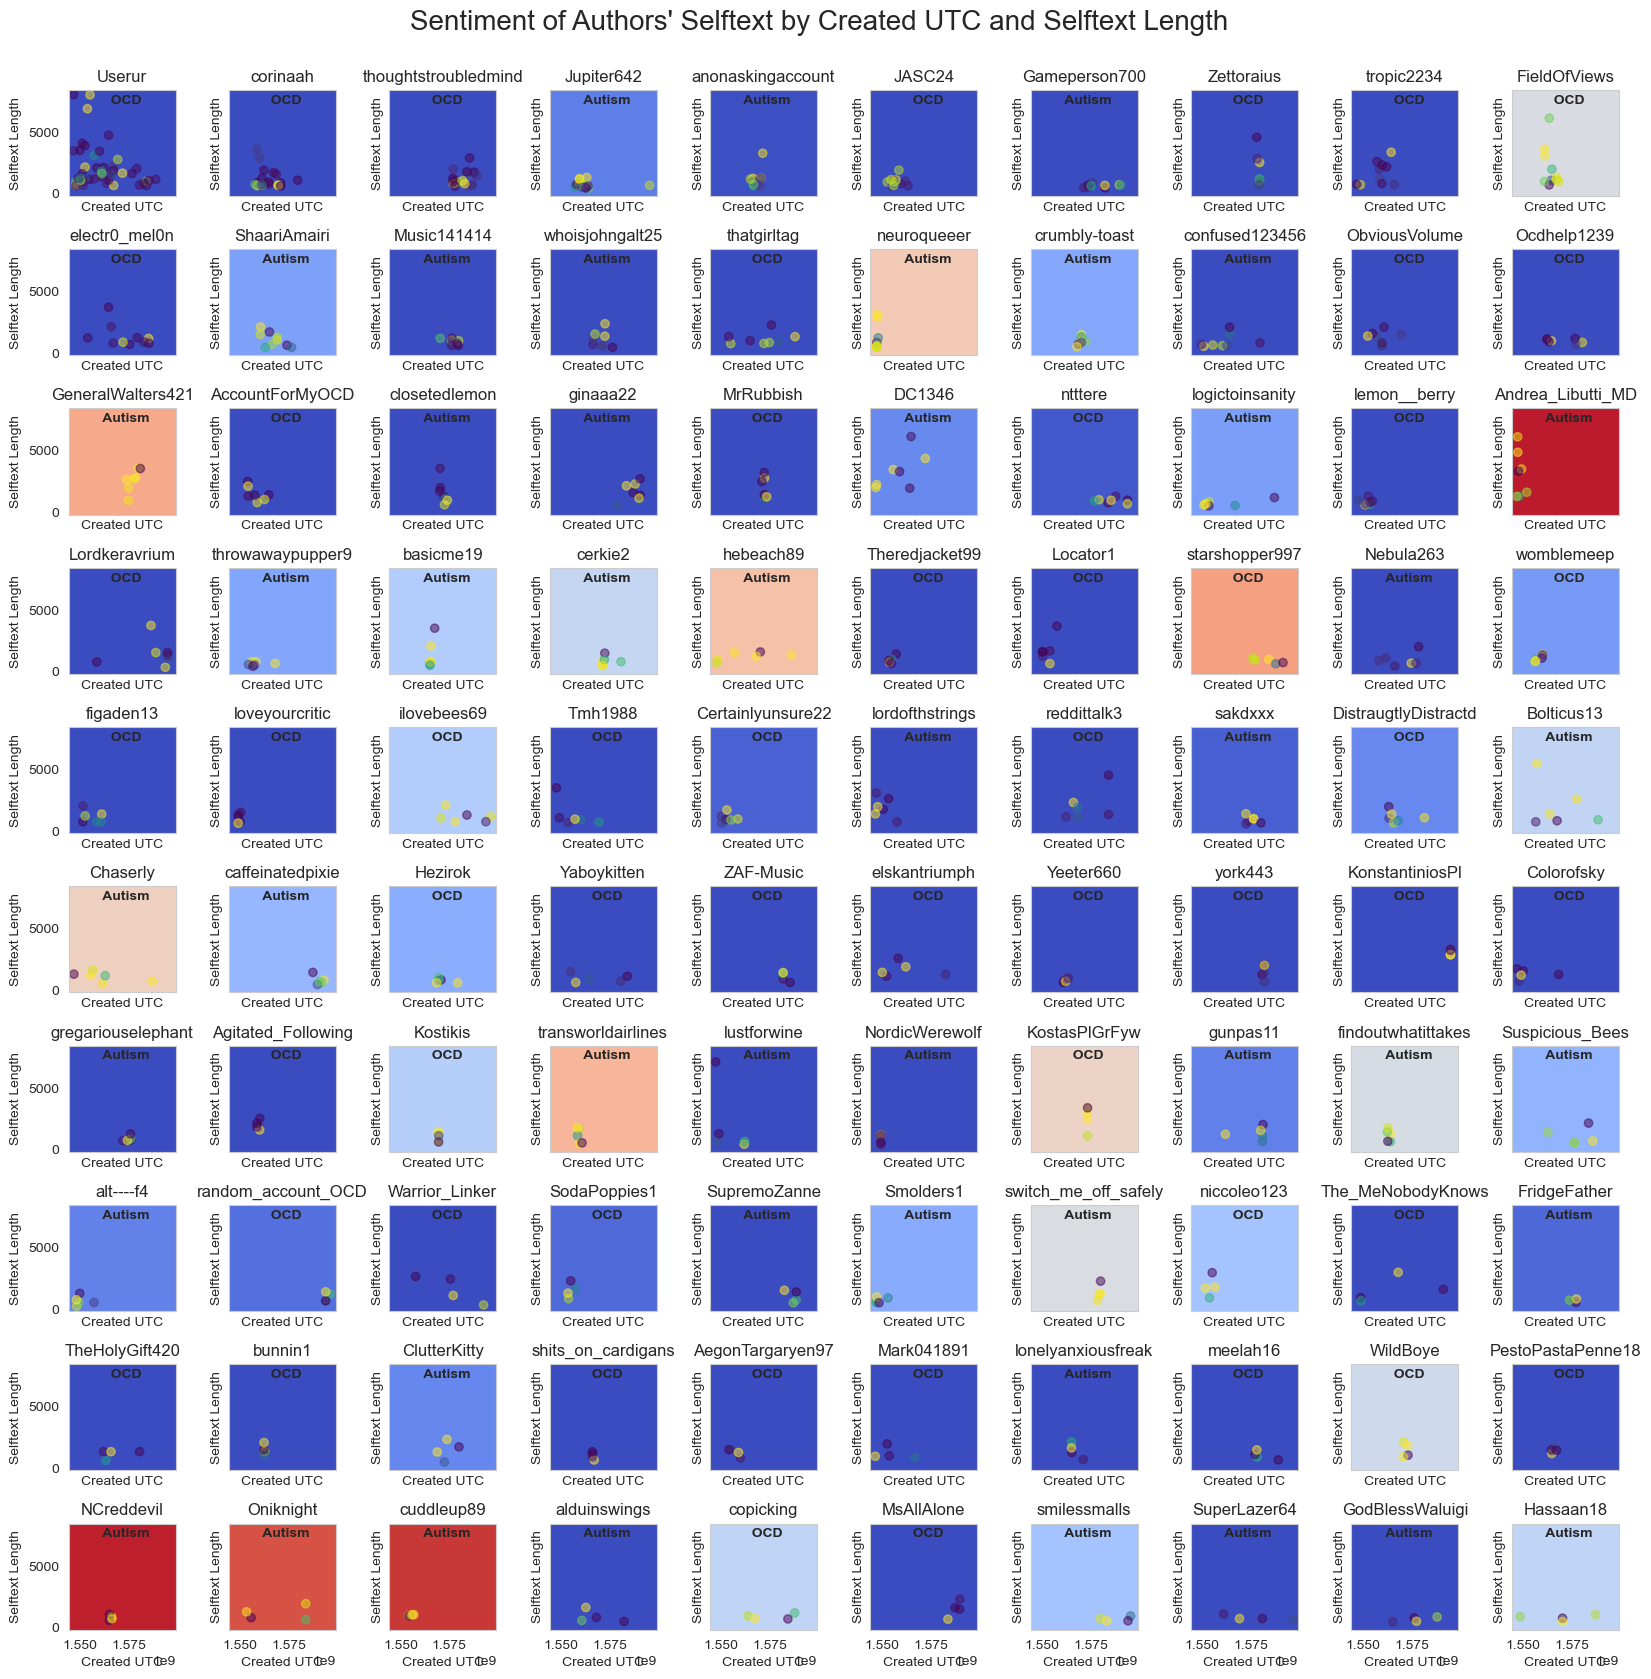

In [10]:
# plot the sentiment values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.
# make the background color of each plot correspond to the average sentiment value for that author in the `sentiment` column (this is the average sentiment value for all of the posts by that author) use the following color map: 'coolwarm' (this is the same color map used for the scatterplots)
# make the background color of the plot lighter if the average sentiment value is closer to 0 and darker if the average sentiment value is closer to 1

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:100]):
    try:
        ax = axes[i//10, i%10]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='viridis', alpha=0.5)
        # add a colorbar to the plot and label it 'Sentiment' (this is the sentiment column in the df)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            # align text horizontally at the center of the plot and vertically at the top of the plot
            ax.text(0.5, 0.9, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        else:
            ax.text(0.5, 0.9, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        ax.set_facecolor(plt.cm.coolwarm(df[df['author']==author]['sentiment'].mean()))
        # colorbar
        # label
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
# add a legend
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();

In [11]:
# plot selftext length vs created UTC on one scatterplot
# color - the author
# size - number of posts by that author (total number of posts in the df)
df['posts_by_author'] = df['author'].map(df['author'].value_counts()) # add a column to the df that shows the number of posts by each author
# give each author a random unique hex color code i.e. '#aabbcc' for the first author, '#ffe111' for the second author, etc. (this will be used for the color of the points on the scatterplot)
# use the following color map: 'coolwarm'
import random # this is used to generate random hex color codes
def random_color():
    return '#%06x' % random.randint(0, 0xFFFFFF) # this will generate a random hex color code
df['author_color'] = df['author'].map({author: random_color() for author in df['author'].unique()}) # add a column to the df that shows the color for each author

# sample
df.head()

author  created_utc      id  target  \
0            sh115   1557323366  bm5i03       1   
1  Dazzling_Alight   1581623251  f3fnjt       1   
2       DH2007able   1560967246  c2kcut       1   
3          sarsapa   1551549663  awkdeg       1   
4        nealacrea   1563397295  ceisgc       1   

                                            selftext  selftext_length  \
0  Compulsively reading about things that scare y...             2505   
1  Coronavirus is triggering me so badly live in ...             1013   
2  feel like my mind just doesnt want me to be re...             1183   
3  making mockery out of mental illness opened up...             1066   
4  How can better communicate the extent to which...              956   

   selftext_word_count    a   b   c  ...   w   x   y  z  sentiment  positive  \
0                  455  170  37  43  ...  30  12  41  2    -0.9832     0.150   
1                  180   55  11  22  ...  12   1  24  0    -0.9797     0.101   
2                  219   61  20  32  ...  17   3  23  0     0.3373     0.081   
3                  208   59   8  22  ...  22   1  20  3     0.5537     0.108   
4                  163   60   7  21  ...  13   4  17  0     0.6365     0.124   

   neutral  negative  posts_by_author  author_color  
0    0.662     0.188                1       #a80a7c  
1    0.698     0.201                1       #504482  
2    0.851     0.067                1       #7d76dd  
3    0.790     0.102                1       #8f8793  
4    0.774     0.102                1       #ba6b91  

[5 rows x 39 columns]

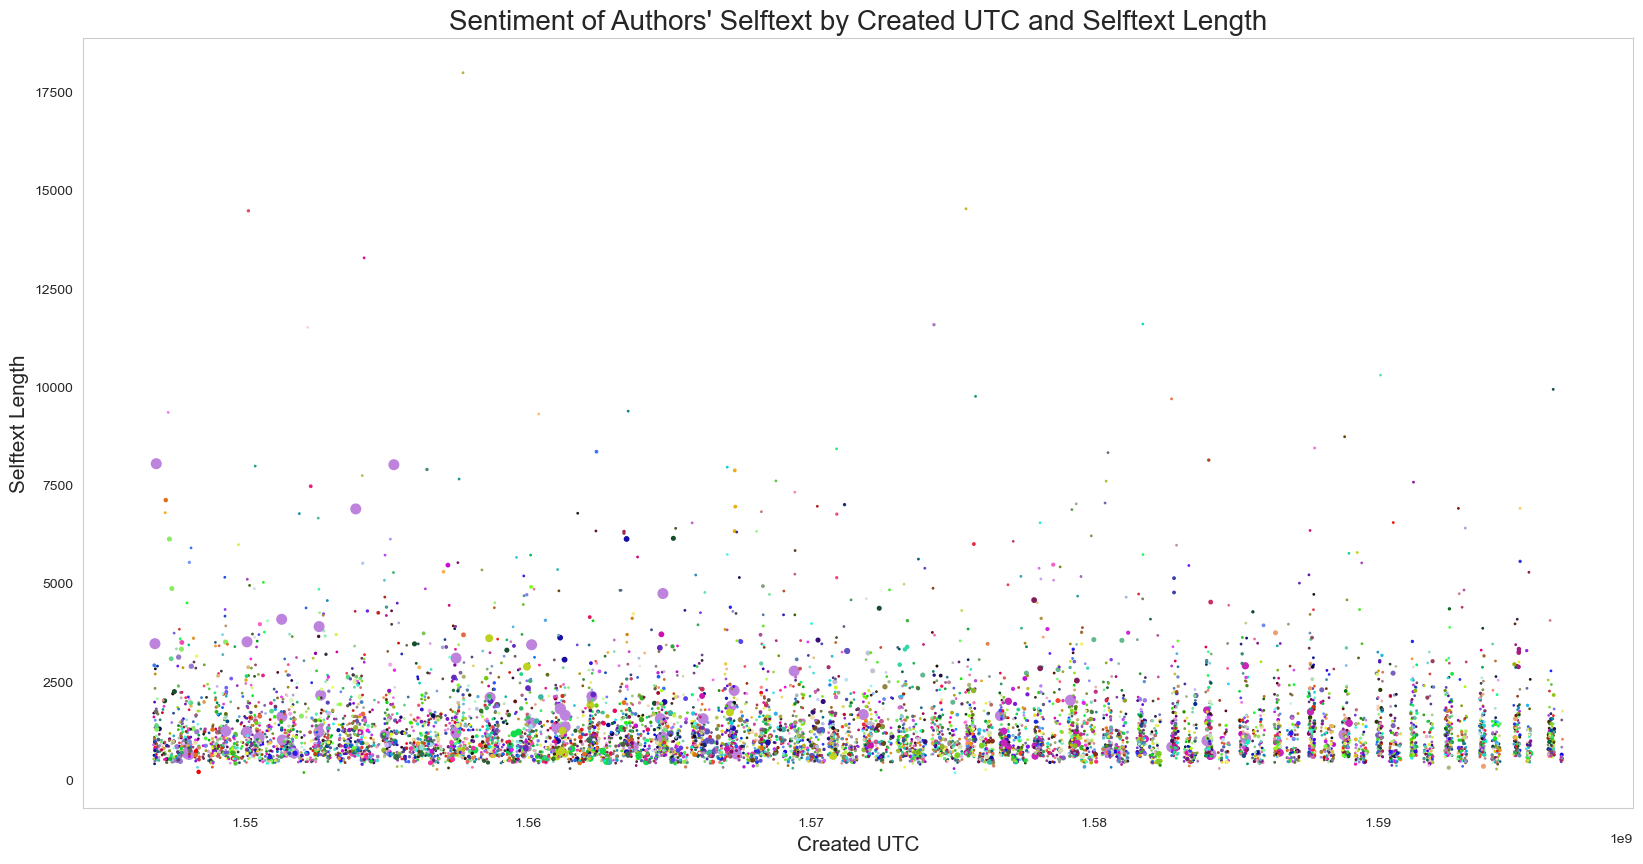

In [12]:
# plot selftext length vs created UTC on one scatterplot
# color - author_color column (a hex color code for each author)
# size - number of posts by that author (total number of posts in the df)
df['posts_by_author'] = df['author'].map(df['author'].value_counts()) # add a column to the df that shows the number of posts by each author
# alpha - the sentiment value for that post (this is the sentiment column in the df)
# make the size of each point correspond to the number of posts by that author (this is the total number of posts in the df)
# make the alpha of each point correspond to the sentiment value for that post (this is the sentiment column in the df)
# do not add a colorbar to the plot
# add a legend to the plot
# add a title to the plot
# add a label to the x-axis
# add a label to the y-axis

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'])
plt.title('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.ylabel('Selftext Length', fontsize=15)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();


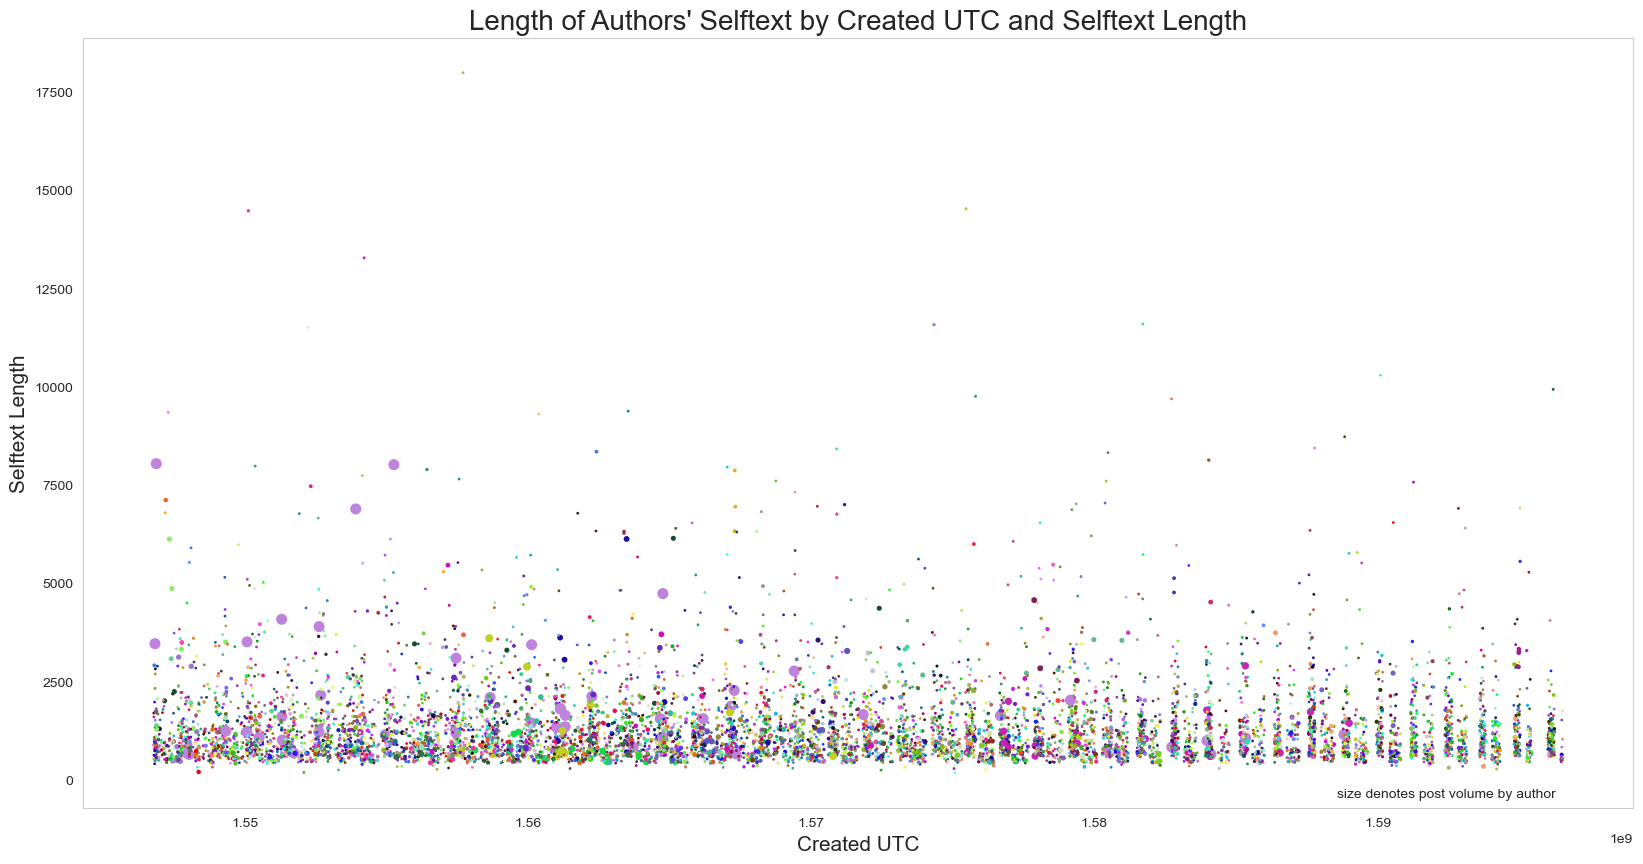

In [13]:

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'])
plt.title('Length of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
# annotate the plot with the notation "size denotes post volume by author" (place this annotation in the bottom right corner of the plot)
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();

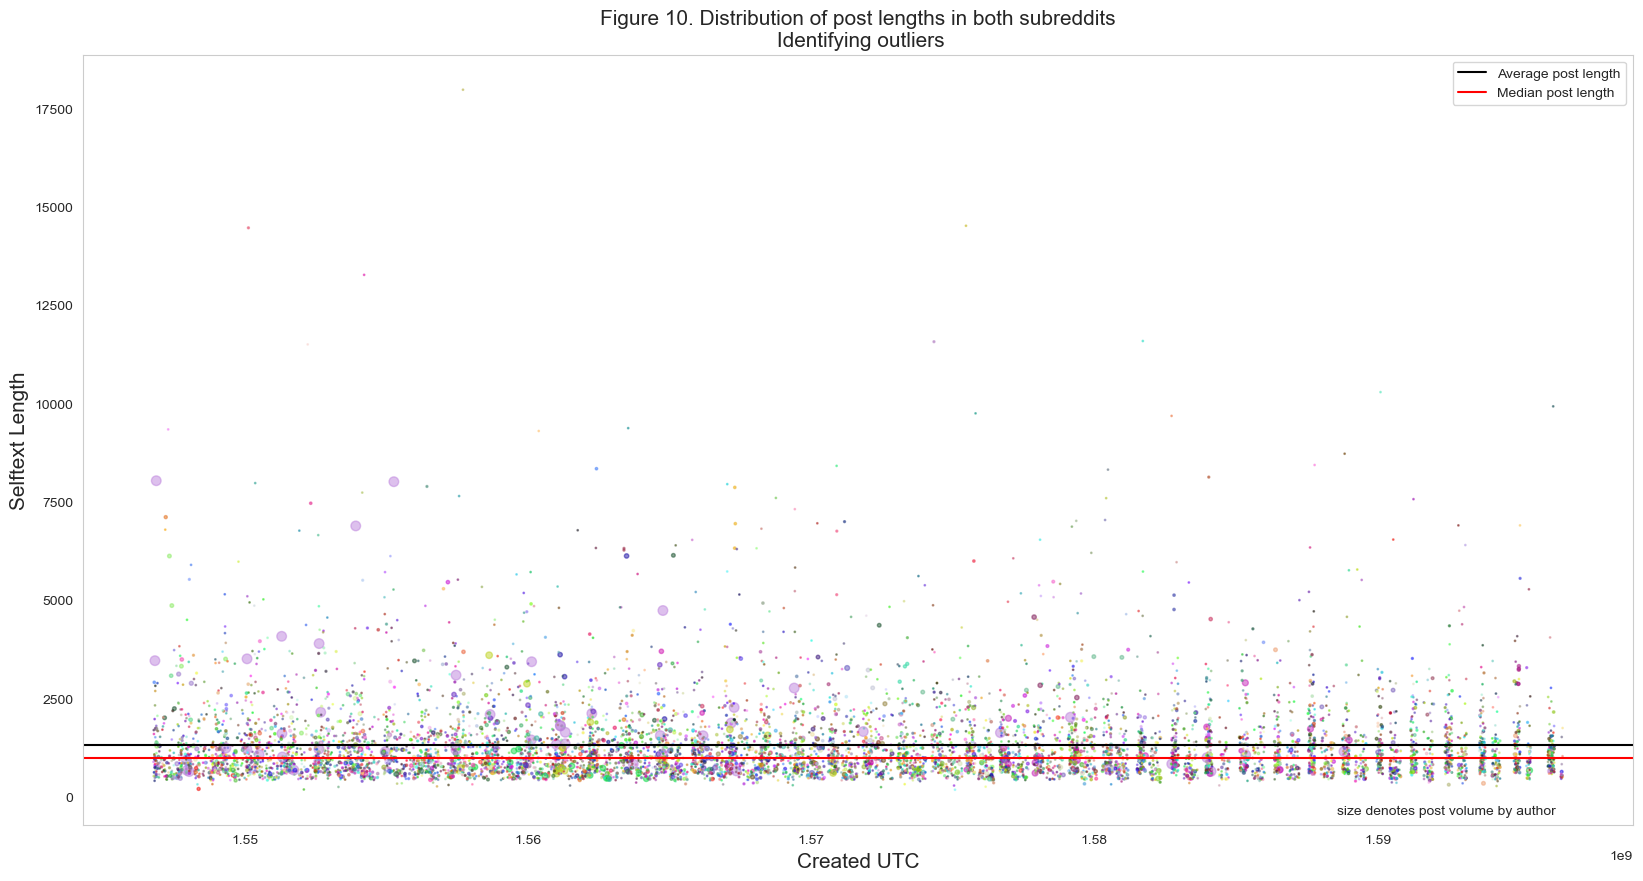

In [14]:
# repeat the plot above but add two horizontal lines to the plot that show:
# 1. the average selftext length for the OCD and Autism subreddits (together) - black line
# 2. the median selftext length for the OCD and Autism subreddits (together) - red line
# also, keep colors the same as before but fade them by 0.5 (i.e. make them 50% transparent) so that the lines are more visible

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 10. Distribution of post lengths in both subreddits\n Identifying outliers', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
mean_val_preoutlier_removal = df['selftext_length'].mean()
median_val_preoutlier_removal = df['selftext_length'].median()
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length')
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length')
plt.legend()
plt.savefig('../images/figure_10.png')
plt.show();

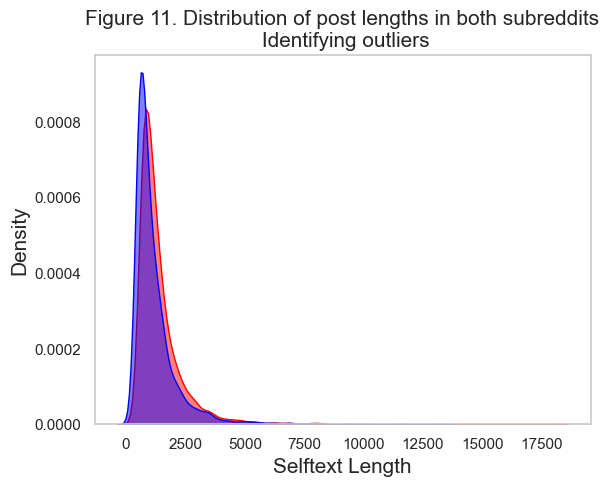

In [15]:
# repeat the plot above (using seaborn) but add a density plot to the plot that shows the distribution of selftext length for the OCD and Autism subreddits (together) - orange filled area (use matplotlib) - this will be the background of the plot (i.e. the density plot will be the background of the plot) - make the density plot transparent by 0.5 (i.e. make it 50% transparent) so that the points are more visible - make the density plot have a black outline

import seaborn as sns
sns.set(style="whitegrid")
# set the area of the plot to focus on the data (i.e. remove the whitespace around the data)
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the size of the plot to 20 inches by 10 inches

# add 'ocd_selftext_length' and 'autism_selftext_length' columns to the df
df['ocd_selftext_length'] = df[df['target']==1]['selftext_length']
df['autism_selftext_length'] = df[df['target']==0]['selftext_length']




fig = sns.kdeplot(df['ocd_selftext_length'], shade=True, color='red', alpha=0.5)
fig = sns.kdeplot(df['autism_selftext_length'], shade=True, color='blue', alpha=0.5)
plt.title('Figure 11. Distribution of post lengths in both subreddits\n Identifying outliers', fontsize=15)
plt.xlabel('Selftext Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.show();





In [16]:
IQR = df['selftext_length'].quantile(0.75) - df['selftext_length'].quantile(0.25) # calculate the interquartile range
lower_bound = df['selftext_length'].quantile(0.25) - (1.5 * IQR) # calculate the lower bound
upper_bound = df['selftext_length'].quantile(0.75) + (1.5 * IQR) # calculate the upper bound
print(f'lower bound: {lower_bound} characters in selftext')
print(f'upper bound: {upper_bound} characters in selftext')

# remove outliers from the df
print(f'number of rows in df before removing outliers: {df.shape[0]}')
preshape = df.shape[0]
df = df[(df['selftext_length'] > lower_bound) & (df['selftext_length'] < upper_bound)]
print(f'number of rows in df after removing outliers: {df.shape[0]}')
print(f'number of rows removed: {preshape - df.shape[0]}')
outliers_removed = preshape - df.shape[0]


lower bound: -483.75 characters in selftext
upper bound: 2690.25 characters in selftext
number of rows in df before removing outliers: 7935
number of rows in df after removing outliers: 7361
number of rows removed: 574


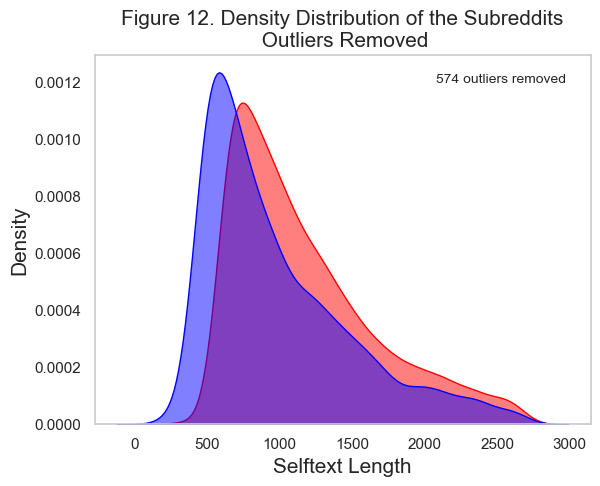

In [17]:
# repeat the plot above (using seaborn) but add a density plot to the plot that shows the distribution of selftext length for the OCD and Autism subreddits (together) - orange filled area (use matplotlib) - this will be the background of the plot (i.e. the density plot will be the background of the plot) - make the density plot transparent by 0.5 (i.e. make it 50% transparent) so that the points are more visible - make the density plot have a black outline

import seaborn as sns
sns.set(style="whitegrid")
# set the area of the plot to focus on the data (i.e. remove the whitespace around the data)
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the size of the plot to 20 inches by 10 inches

# add 'ocd_selftext_length' and 'autism_selftext_length' columns to the df
df['ocd_selftext_length'] = df[df['target']==1]['selftext_length']
df['autism_selftext_length'] = df[df['target']==0]['selftext_length']




fig = sns.kdeplot(df['ocd_selftext_length'], shade=True, color='red', alpha=0.5)
fig = sns.kdeplot(df['autism_selftext_length'], shade=True, color='blue', alpha=0.5)
plt.title('Figure 12. Density Distribution of the Subreddits\n Outliers Removed', fontsize=15)
# annotate with outlier removal information in top right corner
plt.annotate(f'{outliers_removed} outliers removed', xy=(0.95, 0.95), xycoords='axes fraction', horizontalalignment='right', verticalalignment='top', fontsize=10)
plt.xlabel('Selftext Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
# save the figure
plt.savefig('../images/figure_12.png')
plt.show();





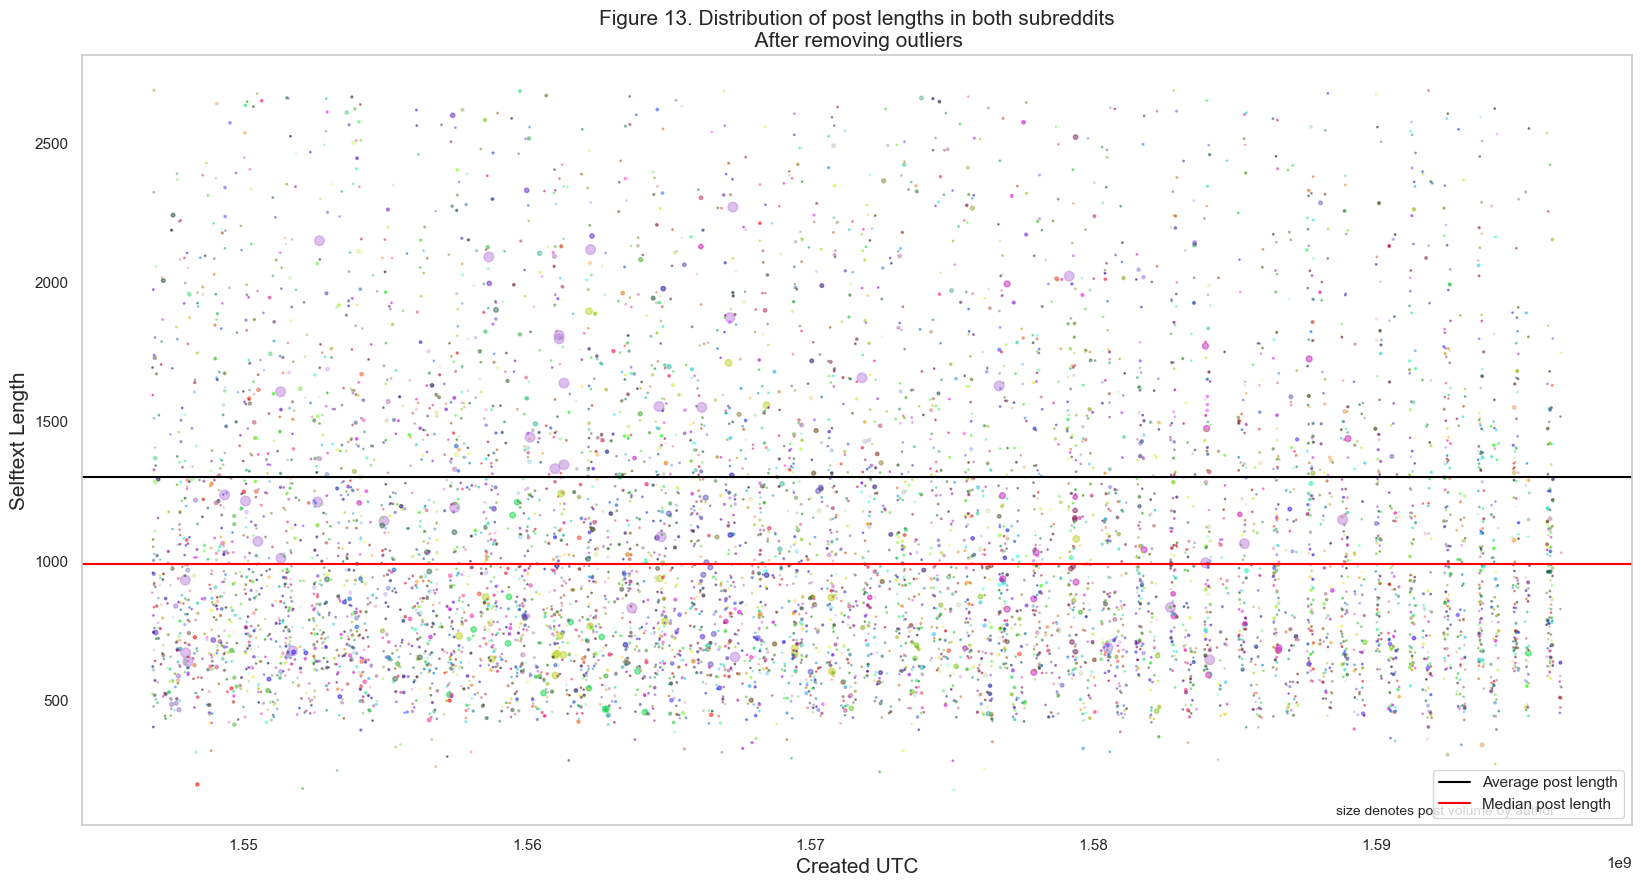

In [18]:
# repeat the plot above but add two horizontal lines to the plot that show:
# 1. the average selftext length for the OCD and Autism subreddits (together) - black line
# 2. the median selftext length for the OCD and Autism subreddits (together) - red line
# also, keep colors the same as before but fade them by 0.5 (i.e. make them 50% transparent) so that the lines are more visible

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 13. Distribution of post lengths in both subreddits\n After removing outliers', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length') # using the previously calculated mean value of the selftext length
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length') # using the previously calculated median value of the selftext length
plt.legend()
plt.savefig('../images/figure_13.png')
plt.show();

In [19]:
df.head()

author  created_utc      id  target  \
0            sh115   1557323366  bm5i03       1   
1  Dazzling_Alight   1581623251  f3fnjt       1   
2       DH2007able   1560967246  c2kcut       1   
3          sarsapa   1551549663  awkdeg       1   
4        nealacrea   1563397295  ceisgc       1   

                                            selftext  selftext_length  \
0  Compulsively reading about things that scare y...             2505   
1  Coronavirus is triggering me so badly live in ...             1013   
2  feel like my mind just doesnt want me to be re...             1183   
3  making mockery out of mental illness opened up...             1066   
4  How can better communicate the extent to which...              956   

   selftext_word_count    a   b   c  ...   y  z  sentiment  positive  neutral  \
0                  455  170  37  43  ...  41  2    -0.9832     0.150    0.662   
1                  180   55  11  22  ...  24  0    -0.9797     0.101    0.698   
2                  219   61  20  32  ...  23  0     0.3373     0.081    0.851   
3                  208   59   8  22  ...  20  3     0.5537     0.108    0.790   
4                  163   60   7  21  ...  17  0     0.6365     0.124    0.774   

   negative  posts_by_author  author_color  ocd_selftext_length  \
0     0.188                1       #a80a7c               2505.0   
1     0.201                1       #504482               1013.0   
2     0.067                1       #7d76dd               1183.0   
3     0.102                1       #8f8793               1066.0   
4     0.102                1       #ba6b91                956.0   

   autism_selftext_length  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  

[5 rows x 41 columns]

In [20]:
df.describe()

created_utc       target  selftext_length  selftext_word_count  \
count  7.361000e+03  7361.000000      7361.000000          7361.000000   
mean   1.570665e+09     0.546121      1083.356337           199.024181   
std    1.417027e+07     0.497902       508.628039            94.121148   
min    1.546778e+09     0.000000       178.000000             7.000000   
25%    1.558641e+09     0.000000       691.000000           127.000000   
50%    1.569874e+09     1.000000       944.000000           174.000000   
75%    1.582317e+09     1.000000      1356.000000           250.000000   
max    1.596526e+09     1.000000      2690.000000           539.000000   

                 a            b            c            d            e  \
count  7361.000000  7361.000000  7361.000000  7361.000000  7361.000000   
mean     64.869855    13.737128    20.207988    33.809808   103.466920   
std      32.101210     7.945076    11.298366    17.914773    50.136919   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      41.000000     8.000000    12.000000    21.000000    65.000000   
50%      57.000000    12.000000    18.000000    29.000000    90.000000   
75%      82.000000    18.000000    26.000000    43.000000   130.000000   
max     195.000000    58.000000    85.000000   122.000000   297.000000   

                 f  ...           x            y           z    sentiment  \
count  7361.000000  ...  7361.00000  7361.000000  7361.00000  7361.000000   
mean     17.572612  ...     2.02948    22.558620     0.55305    -0.054983   
std       9.769639  ...     2.13977    11.752041     1.05678     0.818108   
min       0.000000  ...     0.00000     0.000000     0.00000    -0.999000   
25%      10.000000  ...     1.00000    14.000000     0.00000    -0.918200   
50%      15.000000  ...     1.00000    20.000000     0.00000    -0.202300   
75%      23.000000  ...     3.00000    29.000000     1.00000     0.868700   
max      68.000000  ...    22.00000    89.000000    14.00000     0.999200   

          positive      neutral     negative  posts_by_author  \
count  7361.000000  7361.000000  7361.000000      7361.000000   
mean      0.108658     0.779327     0.112021         2.069284   
std       0.054037     0.072032     0.060881         3.893603   
min       0.000000     0.478000     0.000000         1.000000   
25%       0.071000     0.732000     0.069000         1.000000   
50%       0.101000     0.782000     0.107000         1.000000   
75%       0.139000     0.828000     0.149000         2.000000   
max       0.413000     1.000000     0.382000        48.000000   

       ocd_selftext_length  autism_selftext_length  
count          4020.000000             3341.000000  
mean           1169.311692              979.932056  
std             494.466595              506.241768  
min             306.000000              178.000000  
25%             777.750000              588.000000  
50%            1033.000000              822.000000  
75%            1436.000000             1244.000000  
max            2690.000000             2689.000000  

[8 rows x 37 columns]

In [21]:
data = pd.read_csv('../data/master_results_dataframe.csv') # read in the data
data.head() # view the first 5 rows of the data


model  accuracy  precision    recall        f1  \
0                  gaussiannb       NaN   0.744526  0.945695  0.833139   
1          logisticregression       NaN   0.668182  0.973510  0.792453   
2  gradientboostingclassifier       NaN   0.745568  0.947020  0.834306   
3      randomforestclassifier       NaN   0.744306  0.952318  0.835561   
4      decisiontreeclassifier       NaN   0.744017  0.947020  0.833333   

        auc  cross_val_score      rmse       mae        r2       mse  time  \
0  0.730273         0.774555  0.476429  0.226984  0.054855  0.226984   NaN   
1  0.625369         0.701129  0.552771  0.305556 -0.272310  0.305556   NaN   
2  0.731926         0.771777  0.474760  0.225397  0.061465  0.225397   NaN   
3  0.731604         0.769991  0.473923  0.224603  0.064770  0.224603   NaN   
4  0.729946         0.766418  0.476429  0.226984  0.054855  0.226984   NaN   

   train_score  test_score  best_params  \
0     0.774757    0.773016          NaN   
1     0.701131    0.694444          NaN   
2     0.777932    0.774603          NaN   
3     0.780314    0.775397          NaN   
4     0.780314    0.773016          NaN   

                                           residuals  accuracy_score  \
0  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.773016   
1  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.694444   
2  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.774603   
3  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.775397   
4  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.773016   

   best_score  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

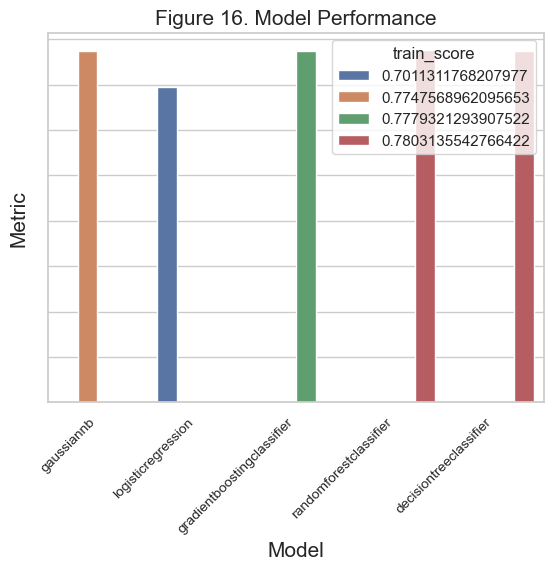

In [22]:
# plot a histogram of the model performance with each metric in a new color
# set the size of the plot to 20 inches by 10 inches
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the title of the plot to 'Figure 16. Model Performance'
# set the x-axis label to 'Model'
# set the y-axis label to 'Metric'
# set the x-axis tick labels to the model names
# set the x-axis tick label font size to 10
# set the y-axis tick label font size to 10
import matplotlib.pyplot as plt
import seaborn as sns

sns_plot = sns.barplot(x='model', y='test_score', hue='train_score', data=data)
sns_plot.set_title('Figure 16. Model Performance', fontsize=15)
sns_plot.set_xlabel('Model', fontsize=15)
sns_plot.set_ylabel('Metric', fontsize=15)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=10)
plt.savefig('../images/figure_16.png')
plt.show();


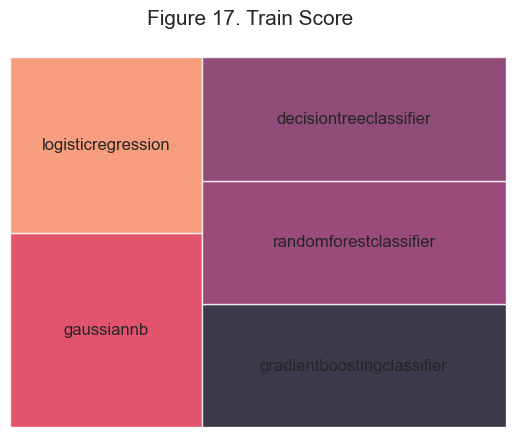

In [23]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd
# plot it
squarify.plot(sizes=data['train_score'], label=data['model'], alpha=.8)
plt.suptitle('Figure 17. Train Score', fontsize=15)
plt.axis('off')
plt.show()

# Comparing Models with Plot9

In [24]:
import pandas as pd
import pandas.api.types as pdtypes
import numpy as np

from plotnine import *
from plydata import *

data = pd.read_csv('../data/master_results_dataframe.csv') # read in the data
print(data.columns)
# the similar columns are: cross_val_score, rmse, mae, r2, mse, train_score, test_score, and accuracy_score.
data = data[['model','cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']] # select only the columns that we want to use
data.head() # view the first 5 rows of the data


Index(['model', 'accuracy', 'precision', 'recall', 'f1', 'auc',
       'cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'time', 'train_score',
       'test_score', 'best_params', 'residuals', 'accuracy_score',
       'best_score'],
      dtype='object')


model  cross_val_score      rmse       mae        r2  \
0                  gaussiannb         0.774555  0.476429  0.226984  0.054855   
1          logisticregression         0.701129  0.552771  0.305556 -0.272310   
2  gradientboostingclassifier         0.771777  0.474760  0.225397  0.061465   
3      randomforestclassifier         0.769991  0.473923  0.224603  0.064770   
4      decisiontreeclassifier         0.766418  0.476429  0.226984  0.054855   

        mse  train_score  test_score  accuracy_score  
0  0.226984     0.774757    0.773016        0.773016  
1  0.305556     0.701131    0.694444        0.694444  
2  0.225397     0.777932    0.774603        0.774603  
3  0.224603     0.780314    0.775397        0.775397  
4  0.226984     0.780314    0.773016        0.773016

In [25]:
point_data = data.melt(id_vars=['model'], var_name='metric', value_name='value') # melt the data
point_data.head() # view the first 5 rows of the data
    
n = 5 # number of models to show


In [26]:
X = data[['model','cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']] # select the columns that we want to use for the X variable

segment_data = X.melt(id_vars=['model'], var_name='metric', value_name='value') # melt the data
segment_data.head() # view the first 5 rows of the data

#percent_format = lambda x: f'{x:.0%}' # create a function that formats the values as percentages
# percent_format must have the same length as range(0, 101, 10), otherwise the plot will not work
percent_format = lambda x: f'{x:.0%}' # create a function that formats the values as percentages
percent_formats = [percent_format(x) for x in range(0, 101, 10)] # create a list of the formatted values

# create a plot9 plot based on the markdown cell above using the data in the 'X' dataframe.
- each model will be it's row (i.e. each model will be a separate row)
- each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
- each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line for that model.
- each metric will be represented by a circle with its color matching the metric color (in the legend) and position along the line (x-axis for the model) matching the metric value.

In [27]:
# creating the plot using plotnine
# set the size of the plot to 20 inches by 10 inches
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the title of the plot to 'Figure 14. Model Performance Metrics'
# set the x-axis label to 'Model'
# set the y-axis label to 'Metric'
# set the x-axis limits to 0 and 1
# set the y-axis limits to 0 and 1
# set the x-axis tick marks to 0.1
# set the y-axis tick marks to 0.1
# set the x-axis tick mark labels to the formatted values in percent_formats
# set the y-axis tick mark labels to the formatted values in percent_formats

# creating the plot
# The plot is made up of two layers: the points and the segments
# The points are the individual values for each model
# The segments are the lines that connect the points
# The segments are created by using the geom_segment() function and the points are created by using the geom_point() function as well.
xgap = 0.1 # set the x-axis gap between the points
ygap = 0.1 # set the y-axis gap between the points
point_size = 1 # set the size of the points
segment_size = 1 # set the size of the segments
point_color = 'black' # set the color of the points
segment_color = 'black' # set the color of the segments
point_alpha = 1 # set the transparency of the points
segment_alpha = 0.5 # set the transparency of the segments
point_shape = 'o' # set the shape of the points
segment_shape = '-' # set the shape of the segments
point_data = data.melt(id_vars=['model'], var_name='metric', value_name='value') # melt the data
segment_data = X.melt(id_vars=['model'], var_name='metric', value_name='value') # melt the data
segment_data['x'] = segment_data['value'] # set the x variable to the value column
segment_data['y'] = segment_data['metric'] # set the y variable to the metric column
# remember, each row is a model, and the metrics fall along a horizontal line (one line) for each model. The colors of the points (metric values) correspond to the colors of the metric they represent (i.e. the color of the point for the cross_val_score metric for logreg is the same color as the point on the line for the KNN model.)
# the segments are created by using the geom_segment() function and the points are created by using the geom_point() function as well.
# create the plot

point_data.head()

model           metric     value
0                  gaussiannb  cross_val_score  0.774555
1          logisticregression  cross_val_score  0.701129
2  gradientboostingclassifier  cross_val_score  0.771777
3      randomforestclassifier  cross_val_score  0.769991
4      decisiontreeclassifier  cross_val_score  0.766418

In [28]:
# create a dataframe with the following columns:
# - x: the x-axis position of the point
# - y: the y-axis position of the point
# - label: the label for the point
# - color: the color of the point

# convert the X dataframe into a long format dataframe
# - use the id_vars parameter to specify the columns that should not be converted into rows
# - use the value_vars parameter to specify the columns that should be converted into rows
# - use the var_name parameter to specify the name of the column that will contain the variable names
# - use the value_name parameter to specify the name of the column that will contain the variable values
# - use the ignore_index parameter to specify that the index should be reset
X_long = X.melt(id_vars=['model'], var_name='metric', value_name='value', ignore_index=True)

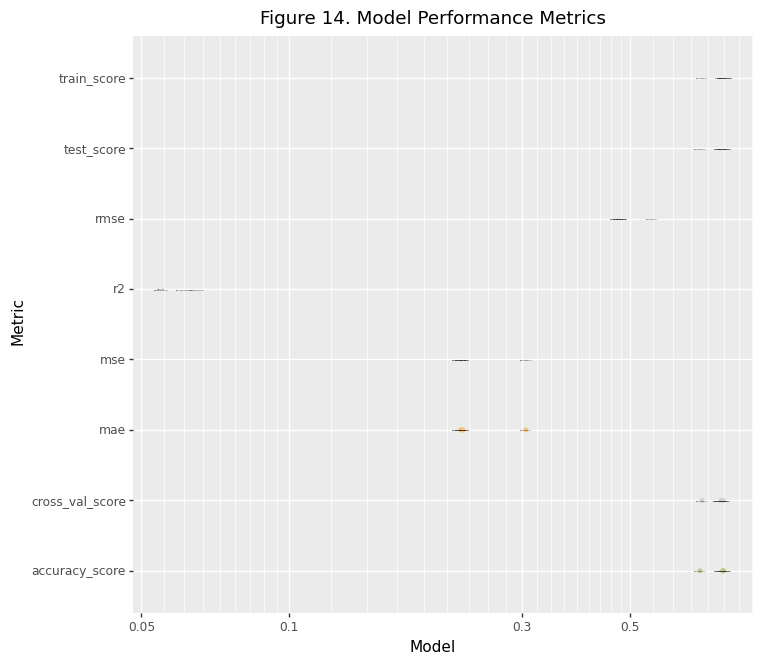

<ggplot: (8786459618633)>

In [33]:
# create a plot9 plot based on the dataframe we created above
# - each model will be it's row (i.e. each model will be a separate row)
# - each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
# - each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line for that model.
# - each metric will be represented by a circle with its color matching the metric color (in the legend) and position along the line (x-axis for the model) matching the metric value.

# create a plot9 plot
# - each model will be it's row (i.e. each model will be a separate row)
# - each metric will fall on the same horizontal axis on that row but will be at the correct distance from the left side of the plot (i.e. 0.90 closer to the right side and 0.10 closer to the left side).
# - each model will have a label on the left side of the plot (i.e. the model name). The label will be the same color as the line for that model.
# - each metric will be represented by a circle with its color matching the metric color (in the legend) and position along the line (x-axis for the model) matching the metric value.

metric_colors = {'cross_val_score': '#1f77b4', 'rmse': '#ff7f0e', 'mae': '#2ca02c', 'r2': '#d62728', 'mse': '#9467bd', 'train_score': '#8c564b', 'test_score': '#e377c2', 'accuracy_score': '#7f7f7f'} # create a dictionary that maps the metric names to colors

(ggplot()
    # add segment data
    
    # add point data
    + geom_point(
        data=point_data,
        mapping=aes(x='value', y='metric', color='metric'),
        size=point_size,
        alpha=point_alpha,
        shape=point_shape)
    # add labels
    + geom_text(data=X_long, mapping=aes(x='value', y='metric', label='model'), size=point_size, alpha=point_alpha, color=point_color)
    # add the legend
    # set the background color of the plot to white (i.e. #FFFFFF)
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    # set the style of the plot to whitegrid
    + theme(legend_position='bottom')
    # set the title of the plot to 'Figure 14. Model Performance Metrics'
    + labs(title='Figure 14. Model Performance Metrics')
    # set the x-axis label to 'Model'
    + labs(x='Model')
    # set the y-axis label to 'Metric'
    + labs(y='Metric')
    # set the x-axis limits to 0 and 1
    + xlim(0, 1)
    # set the y-axis limits to 0 and 1
    + ylim(0, 1)
    # set the x-axis tick marks to 0.1
    + scale_x_continuous(breaks=np.arange(0, 1.1, 0.1))
    # set the y-axis tick marks to 0.1
    + scale_y_continuous(breaks=np.arange(0, 1.1, 0.1))
    + scale_x_log10()
    + scale_y_discrete()
    + scale_color_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
    + guides(color=None)
    + theme(figure_size=(8, 7.5))
)


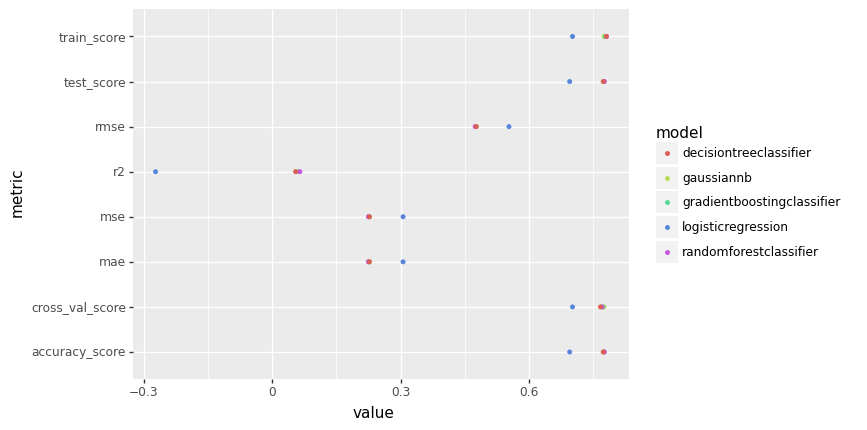

<ggplot: (8786459611233)>

In [34]:
# create a simple ggplot() plot
(ggplot()
+ geom_point(data=point_data, mapping=aes(x='value', y='metric', color='model'), size=point_size, alpha=point_alpha, shape=point_shape)
)

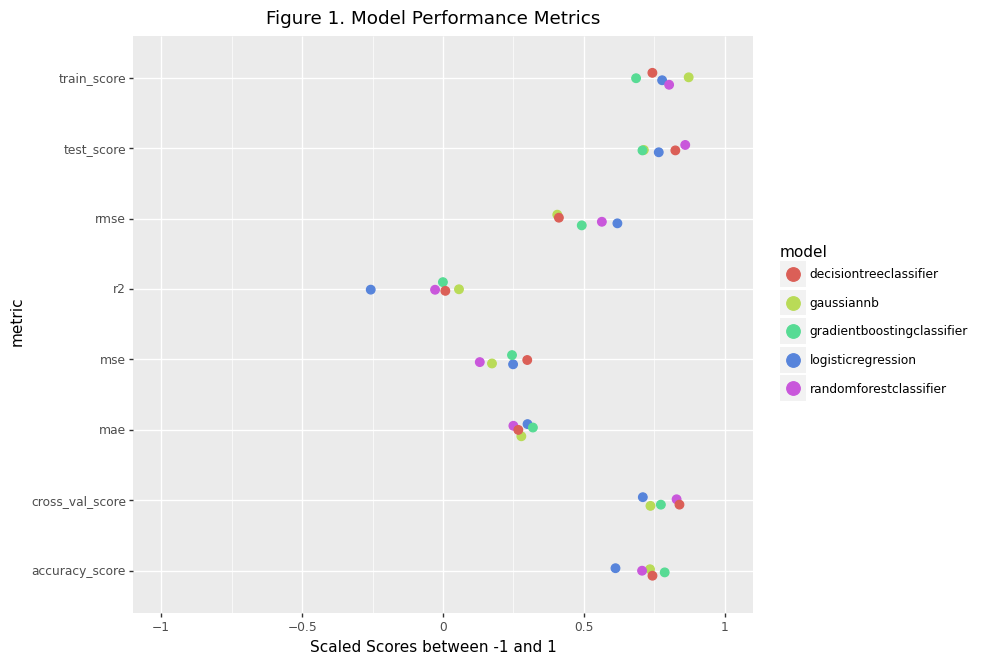

<ggplot: (8786408639320)>

In [36]:
# create a simple ggplot() plot
(ggplot()
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    + labs(title='Figure 1. Model Performance Metrics')
    + labs(x='Scaled Scores between -1 and 1')
    # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
    + geom_jitter(
        data=point_data,
        mapping=aes(x='value', y='metric', color='model'),
        size=3,
        alpha=point_alpha,
        # make the background of the plot white
        shape='o',
        # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
        width=0.1,
        height=0.1
        )
    + scale_x_continuous(limits=(-1, 1))
    + scale_fill_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
    + guides(color = guide_legend(override_aes={'size': 5}))
    + theme(figure_size=(8, 7.5))
) 

In [32]:
import random
# create a dataframe with the following columns:
# - x: the x-axis position of the point
# - y: the y-axis position of the point
# - label: the label for the point
# - color: the color of the point
def get_scores(model,metric,df):
    """
    get_scores returns the scores for a given model and metric

    _extended_summary_

    :param model: _description_
    :type model: _type_
    :param metric: _description_
    :type metric: _type_
    :param df: _description_
    :type df: _type_
    :return: _description_
    :rtype: 
    """
    res = df[df['model'] == model].iloc[0].values[1:]  # get the scores for the model

    return res

def random_hex_color():
    return '#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))  # generate a random hex color    


list_of_metrics= ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']
print(len(data['model']))
print(len(data['cross_val_score']))

x = [get_scores(model, metric, X) for model in data['model'] for metric in list_of_metrics]
y = ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']
label = ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score']
color = [random_hex_color() for model in data['model'] for metric in list_of_metrics]

print(f'length of x: {len(x)}')
print(f'length of y: {len(y)}')
print(f'length of label: {len(label)}')
print(f'length of color: {len(color)}')

query = {
    'model_name': 'model_1',
    'metric': 'cross_val_score',
}

sub2 = {
    'x' : get_scores(query['model_name'], query['metric'], data),
    'y': query['metric'],
    'label': query['metric'],
    'color': random_hex_color()
}

for model in data['model']:
    for metric in list_of_metrics:
        query = {
            'model_name': model,
            'metric': metric,
        }
        sub2 = {
            'x' : get_scores(query['model_name'], query['metric'], data),
            'y': query['metric'],
            'label': query['metric'],
            'color': random_hex_color()
        }
        x.append(sub2['x'])
        y.append(sub2['y'])
        label.append(sub2['label'])
        color.append(sub2['color'])
    
print(f'length of x: {len(x)}')
print(f'length of y: {len(y)}')
print(f'length of label: {len(label)}')
print(f'length of color: {len(color)}')



5
5
length of x: 40
length of y: 8
length of label: 8
length of color: 40


IndexError: single positional indexer is out-of-bounds

In [ ]:

point_data = pd.DataFrame(
    {   # for every x, get the get_scores(model, corresponding_y value, df) for each model
        'x': [get_scores(model, metric, X) for model in data['model'] for metric in list_of_metrics],
        'y': ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score'],
        'label': ['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score'],
        'color': [random_hex_color() for model in data['model'] for metric in list_of_metrics]
        
    }
)
# create a plot using Matplotlib or Seaborn
fig, ax = plt.subplots(figsize=(8, 7.5))
ax.scatter(
    point_data['x'],
    point_data['y'],
    color=point_data['color'],
    s=100,
    alpha=0.5,
    edgecolors='black',
    linewidths=0.5,
)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Figure 14. Model Performance Metrics')
ax.set_xlabel('Model')
ax.set_ylabel('Metric')
ax.set_yticks(['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score'])
ax.set_yticklabels(['cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score', 'test_score', 'accuracy_score'])
ax.set_xticks([0.1, 0.9])
ax.set_xticklabels(['LogisticRegression()', 'GradientBoostingClassifier()', 'RandomForestClassifier()', 'GaussianNB()', 'KNeighborsClassifier()', 'DecisionTreeClassifier()'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.text(0.1, 0.9, 'MAE', color='#c3ca8c', ha='left', va='center', size=12)
ax.text(0.9, 0.9, 'MAE', color='#c3ca8c', ha='right', va='center', size=12)
ax.text(0.1, 0.1, 'MSE', color='#d1d3d4', ha='left', va='center', size=12)
ax.text(0.9, 0.1, 'MSE', color='#d1d3d4', ha='right', va='center', size=12)
ax.text(0.1, 0.5, 'RMSE', color='#f2c480', ha='left', va='center', size=12)
ax.text(0.9, 0.5, 'RMSE', color='#f2c480', ha='right', va='center', size=12)
plt.show()

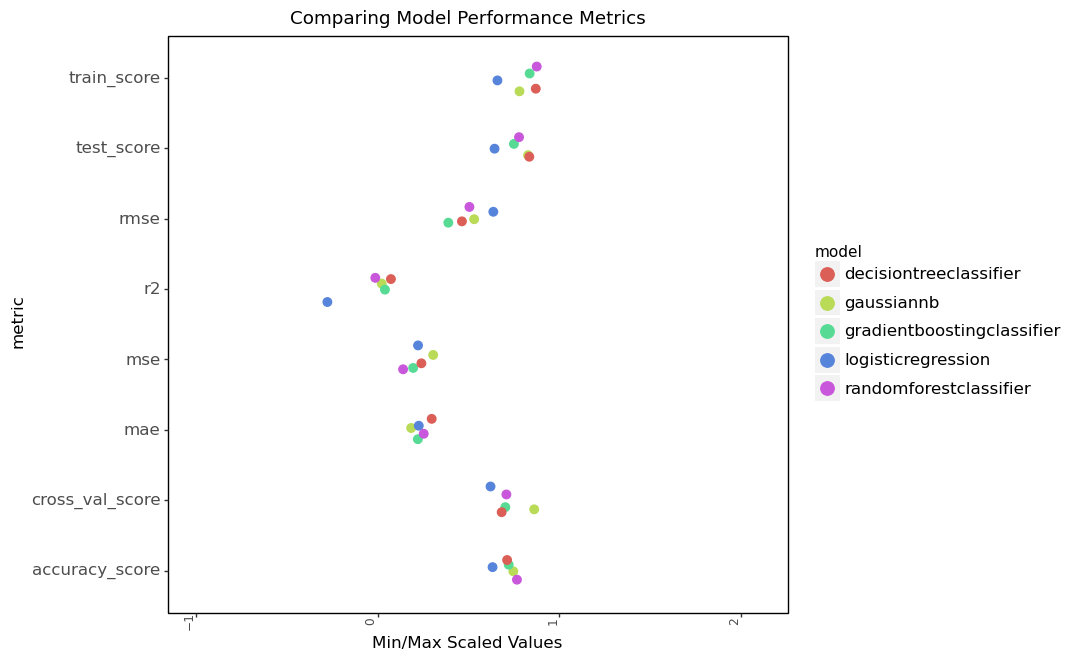

<ggplot: (8774260626598)>

In [ ]:
# create a simple ggplot() plot
(ggplot()
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    + labs(title='Comparing Model Performance Metrics')
    + labs(x='Min/Max Scaled Values')
    # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
    + geom_jitter(
        data=point_data,
        mapping=aes(x='value', y='metric', color='model'),
        size=3,
        alpha=point_alpha,
        # make the background of the plot white
        shape='o',
        # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
        width=0.1,
        height=0.2
        )
    + scale_x_continuous(limits=(-1, xgap+2))
    + scale_fill_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
    + guides(color = guide_legend(override_aes={'size': 5})) # make the legend points larger, so they are easier to see
    + theme(figure_size=(8, 7.5))
    + theme(axis_text_x=element_text(angle=90, hjust=1, vjust=0.5))
    + theme(axis_text_y=element_text(size=12))
    + theme(axis_title_x=element_text(size=12))
    + theme(axis_title_y=element_text(size=12)) 
    + theme(legend_text=element_text(size=12))
    + theme(legend_background=element_rect(fill='#FFFFFF'))
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    + theme(panel_grid_major=element_blank())
    + theme(panel_grid_minor=element_blank())
    + theme(panel_border=element_rect(fill='#FFFFFF'))
    + theme(panel_background=element_rect(fill='#FFFFFF'))
    + theme(panel_spacing_x=0.5)
)

# save the plot as a PNG file
# ggsave(filename='comparing_metrics.png', plot=fig, dpi=300)


# add a vertical line 

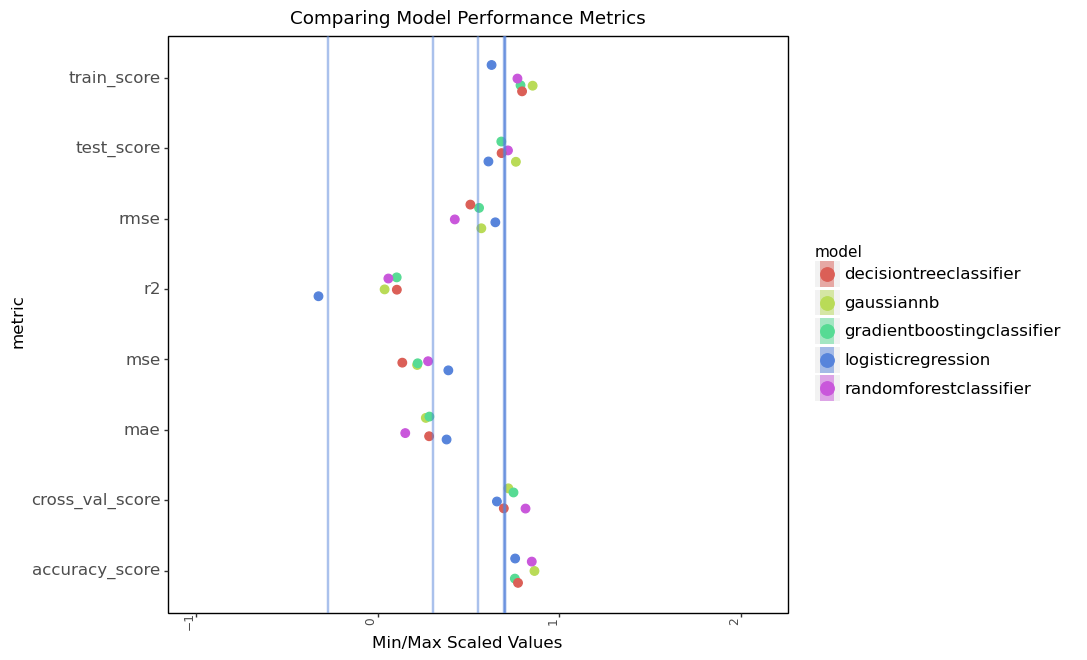

<ggplot: (8774244350838)>

In [ ]:
# make the plot again but connect a line through each blue point vertically (i.e. from the bottom to the top of the plot)
(ggplot()
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    + labs(title='Comparing Model Performance Metrics')
    + labs(x='Min/Max Scaled Values')
    # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
    + geom_jitter(
        data=point_data,
        mapping=aes(x='value', y='metric', color='model'),
        size=3,
        alpha=point_alpha,
        # make the background of the plot white
        shape='o',
        # make the points slightly jittered (vertically) (i.e. slightly offset from their actual position)
        width=0.1,
        height=0.2
        )
    + geom_vline( #  make this line trace the blue points vertically (i.e. from the bottom to the top of the plot)
        data=point_data[point_data['model'] == 'logisticregression'],
        type 
        linetype='solid',
        size=1,
        alpha=0.5
    )
    + scale_x_continuous(limits=(-1, xgap+2))
    + scale_fill_manual(values=['#c3ca8c', '#d1d3d4', '#f2c480'])
    + guides(color = guide_legend(override_aes={'size': 5})) # make the legend points larger, so they are easier to see
    + theme(figure_size=(8, 7.5))
    + theme(axis_text_x=element_text(angle=90, hjust=1, vjust=0.5))
    + theme(axis_text_y=element_text(size=12))
    + theme(axis_title_x=element_text(size=12))
    + theme(axis_title_y=element_text(size=12)) 
    + theme(legend_text=element_text(size=12))
    + theme(legend_background=element_rect(fill='#FFFFFF'))
    + theme(plot_background=element_rect(fill='#FFFFFF'))
    + theme(panel_grid_major=element_blank())
    + theme(panel_grid_minor=element_blank())
    + theme(panel_border=element_rect(fill='#FFFFFF'))
    + theme(panel_background=element_rect(fill='#FFFFFF'))
    + theme(panel_spacing_x=0.5)
)

For the next data visual we will use proportions. It visualizes probability as frequency. There are 100 squares in each grid, and each square represents either success of failure in predicting the r/Autism thread. A 1% chance of success corresponds to 1 dark and 99 light squares, a 10% chance of success corresponds to 10 dark and 90 light squares, and a 40% chance of success corresponds to 40 dark and 60 light squares.

In [ ]:
# For the next data visual we will use proportions. It visualizes probability as frequency. There are 100 squares in each grid, and each square represents either success of failure in predicting the r/Autism thread. A 1% chance of success corresponds to 1 dark and 99 light squares, a 10% chance of success corresponds to 10 dark and 90 light squares, and a 40% chance of success corresponds to 40 dark and 60 light squares.
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));

plt.show()

NameError: name 'plt' is not defined

In [40]:
master_results_dataframe.head()

model  accuracy  precision    recall        f1  \
0                  gaussiannb       NaN   0.744526  0.945695  0.833139   
1          logisticregression       NaN   0.668182  0.973510  0.792453   
2  gradientboostingclassifier       NaN   0.745568  0.947020  0.834306   
3      randomforestclassifier       NaN   0.744306  0.952318  0.835561   
4      decisiontreeclassifier       NaN   0.744017  0.947020  0.833333   

        auc  cross_val_score      rmse       mae        r2       mse  time  \
0  0.730273         0.774555  0.476429  0.226984  0.054855  0.226984   NaN   
1  0.625369         0.701129  0.552771  0.305556 -0.272310  0.305556   NaN   
2  0.731926         0.771777  0.474760  0.225397  0.061465  0.225397   NaN   
3  0.731604         0.769991  0.473923  0.224603  0.064770  0.224603   NaN   
4  0.729946         0.766418  0.476429  0.226984  0.054855  0.226984   NaN   

   train_score  test_score  best_params  \
0     0.774757    0.773016          NaN   
1     0.701131    0.694444          NaN   
2     0.777932    0.774603          NaN   
3     0.780314    0.775397          NaN   
4     0.780314    0.773016          NaN   

                                           residuals  accuracy_score  \
0  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.773016   
1  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.694444   
2  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.774603   
3  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.775397   
4  3905    0\n3142    0\n5328    0\n3803    0\n99...        0.773016   

   best_score  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [42]:
# This figure is a slope graph generated with seaborn. It has two columns column one is autism and column two is OCD. The individual measurements are the scores for the model. These are scaled between zero and one, and the measurement values are located in the row with the model name for the figure (i.e. in the graph for Random Forest Classifier we will find the values for Accuracy Score, Cross Validation Score ... etc. in the row with "Random Forest" in the Model column of the master_results_dataframe). 
import seaborn as sns
import matplotlib.pyplot as plt

# create a dataframe with the data we want to plot
# it will have two columns: one for the model name and one for the metric name
# the rows will be the individual measurements (i.e. the values for the metric for each model)
# we will use the master_results_dataframe to create this dataframe
model_names = master_results_dataframe['model'].unique() # get the unique model names from the master_results_dataframe

# the metric names are the column names in the master_results_dataframe
# we will remove the 'Model' column name from the list of metric names
metric_names = master_results_dataframe.columns.tolist()
metric_names.remove('model') 

slope_dataframe = pd.DataFrame()
for model in model_names:
    # extract the row for the model
    model_row = master_results_dataframe[master_results_dataframe['model'] == model]
    # extract the values for the metrics (i.e. the values for the metrics for the model)
    model_values = model_row.values.tolist()[0][1:]
    # create a dataframe with the model name and the metric names
    model_dataframe = pd.DataFrame({'model': model, 'metric': metric_names})
    # add the values for the metrics to the dataframe
    model_dataframe['value'] = model_values
    # add the dataframe for the model to the slope_dataframe
    slope_dataframe = slope_dataframe.append(model_dataframe)

# plot the slope graph
fig = sns.catplot(
    data=slope_dataframe,
    x='metric',
    y='value',
    hue='model',
    kind='point',
    height=7,
    aspect=2,
    legend=False,
    palette='Set2'
)

# add the legend
fig._legend.set_title('Model')
new_labels = ['Logistic Regression', 'Random Forest', 'Support Vector Machines', 'K-Nearest Neighbors', 'Gradient Boosting', 'Ada Boost', 'XG Boost']
for t, l in zip(fig._legend.texts, new_labels): t.set_text(l)

plt.show()



TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [43]:
slope_dataframe.head()

model     metric     value
0  gaussiannb   accuracy       NaN
1  gaussiannb  precision  0.744526
2  gaussiannb     recall  0.945695
3  gaussiannb         f1  0.833139
4  gaussiannb        auc  0.730273